In [1]:
# Neural Network：Python codes：Glass-Identification-Data

#----------------------------------------
# Change the current working directory to the specified path.

import os

os.getcwd()


'C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Classification\\Glass-Identification'

In [2]:
#----------------------------------------
# Set random seed for reproducibility.

seed = 543
from numpy import random
random.seed(seed)
from tensorflow import set_random_seed
set_random_seed(seed)

# Import classes and functions.

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.layers import Input, Dense, Activation, concatenate, Dropout


C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#----------------------------------------
# Load the Glass-Identification-Data Compressive Strength dataset.

dataset = np.loadtxt("Glass-Identification-Data.txt", delimiter=",")

print(type(dataset))

print(dataset.shape)

x_group = [[8], [4], [7], [3]]

X = dataset[:, 0:10]
Y = dataset[:, 10]

print(X.shape)
print(Y.shape)

X1 = dataset[:, x_group[0]]
X2 = dataset[:, x_group[1]]
X3 = dataset[:, x_group[2]]
X4 = dataset[:, x_group[3]]

print(X1.shape, X2.shape, X3.shape, X4.shape)
print(Y.shape)

Y = np.array(Y, dtype = int)

print(np.unique(Y))


<class 'numpy.ndarray'>
(214, 11)
(214, 10)
(214,)
(214, 1) (214, 1) (214, 1) (214, 1)
(214,)
[1 2 3 5 6 7]


In [4]:
#----------------------------------------
# one-hot encoding of output variable.

Y_train = np.zeros((len(Y), 7), dtype = int)

for i in range(len(Y)):
	Y_train[i, Y[i] - 1] = 1

np.unique(Y_train)


array([0, 1])

In [5]:
#----------------------------------------
# Standardize the input data.

X_sample_mean = np.mean(X, axis = 0)
print(np.round(X_sample_mean, 4))

X_sample_std = np.std(X, axis = 0, ddof = 1)
print(np.round(X_sample_std, 4))

X1_sample_mean = X_sample_mean[x_group[0]]
print(np.round(X1_sample_mean, 4))

X1_sample_std = X_sample_std[x_group[0]]
print(np.round(X1_sample_std, 4))

X2_sample_mean = X_sample_mean[x_group[1]]
print(np.round(X2_sample_mean, 4))

X2_sample_std = X_sample_std[x_group[1]]
print(np.round(X2_sample_std, 4))

X3_sample_mean = X_sample_mean[x_group[2]]
print(np.round(X3_sample_mean, 4))

X3_sample_std = X_sample_std[x_group[2]]
print(np.round(X3_sample_std, 4))

X4_sample_mean = X_sample_mean[x_group[3]]
print(np.round(X4_sample_mean, 4))

X4_sample_std = X_sample_std[x_group[3]]
print(np.round(X4_sample_std, 4))

standardize = lambda x: (x - np.mean(x, axis = 0)) / np.std(x, axis = 0, ddof = 1)

X_train = standardize(X)

X1_train = X_train[:, x_group[0]]
X2_train = X_train[:, x_group[1]]
X3_train = X_train[:, x_group[2]]
X4_train = X_train[:, x_group[3]]

print(np.round(np.mean(X1_train, axis = 0), 4))
print(np.round(np.std(X1_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X2_train, axis = 0), 4))
print(np.round(np.std(X2_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X3_train, axis = 0), 4))
print(np.round(np.std(X3_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X4_train, axis = 0), 4))
print(np.round(np.std(X4_train, axis = 0, ddof = 1), 4))


[1.07500e+02 1.51840e+00 1.34079e+01 2.68450e+00 1.44490e+00 7.26509e+01
 4.97100e-01 8.95700e+00 1.75000e-01 5.70000e-02]
[6.19206e+01 3.00000e-03 8.16600e-01 1.44240e+00 4.99300e-01 7.74500e-01
 6.52200e-01 1.42320e+00 4.97200e-01 9.74000e-02]
[0.175]
[0.4972]
[1.4449]
[0.4993]
[8.957]
[1.4232]
[2.6845]
[1.4424]
[-0.]
[1.]
[-0.]
[1.]
[-0.]
[1.]
[-0.]
[1.]


In [6]:
#----------------------------------------
# Define 10-fold cross validation test index sets.

fold_num = 10

L = len(X_train)

quotient = L // fold_num
remainder = L % fold_num

fold_length = np.array([quotient]*fold_num)
if remainder > 0:
    fold_length[0:remainder] = fold_length[0:remainder] + 1

index_begin = np.zeros(fold_num, dtype = int)
index_begin[0] = 0

for j in range(1, fold_num):
    index_begin[j] = index_begin[j-1] + fold_length[j-1]

index = np.random.choice(np.arange(L), size = L, replace = False)


In [7]:
# 10-fold cross validation

cv_cc = []
cv_acc = []

for k in range(fold_num):
    # Build the tree like nn model
    input_g1 = Input(shape = (1,))
    x1 = input_g1
    t1 = Dense(units = 3, kernel_initializer = "uniform", activation = "relu")(x1)
    t1 = Dropout(rate = 0.1)(t1)
    #
    y11 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t1)
    y12 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t1)
    #
    input_g2 = Input(shape = (1,))
    x2 = concatenate([y11, input_g2], axis = 1)  # column bind
    t2 = Dense(units = 3, kernel_initializer = "uniform", activation = "relu")(x2)
    t2 = Dropout(rate = 0.1)(t2)
    #
    y21 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t2)
    y22 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t2)
    #
    input_g3 = Input(shape = (1,))
    x3 = concatenate([y21, input_g3], axis = 1)  # column bind
    t3 = Dense(units = 3, kernel_initializer = "uniform", activation = "relu")(x3)
    t3 = Dropout(rate = 0.1)(t3)
    #
    y31 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t3)
    y32 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t3)
    #
    input_g6 = Input(shape = (1,))
    x6 = concatenate([y22, input_g6], axis = 1)  # column bind
    t6 = Dense(units = 3, kernel_initializer = "uniform", activation = "relu")(x6)
    t6 = Dropout(rate = 0.1)(t6)
    #
    y61 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t6)
    y62 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t6)
    #
    x_final =  concatenate([y12, y31, y32, y61, y62], axis = 1)  # column bind
    y_final = Dense(units = 6, kernel_initializer = "uniform", activation = "relu")(x_final)
    y_final = Dropout(rate = 0.1)(y_final)
    y_final = Dense(units = 7, kernel_initializer = "uniform", activation = "softmax")(y_final)
    response = y_final
    #
    model = Model(inputs = [input_g1, input_g2, input_g3, input_g6], outputs = response)
    #
    #model.summary()
    # Compile the model.
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    # Select index sets.
    seq_index = range(index_begin[k], (index_begin[k] + fold_length[k]))
    test_index = index[seq_index]
    train_index = np.delete(index, seq_index)
    # Fit the model.
    history = model.fit([X1_train[train_index], X2_train[train_index], X3_train[train_index], X4_train[train_index]]
                        , Y_train[train_index], validation_split = 0.2, epochs = 1000, batch_size = 20, verbose = 2)
    # Evaluate the model.
    scores = model.evaluate([X1_train[test_index], X2_train[test_index], X3_train[test_index], X4_train[test_index]]
                            , Y_train[test_index], verbose = 0)
    print("%s: %.4f" % (model.metrics_names[0], scores[0]))
    print("%s: %.4f" % (model.metrics_names[1], scores[1]))
    cv_cc.append(scores[0])
    cv_acc.append(scores[1])


Train on 153 samples, validate on 39 samples
Epoch 1/1000
 - 1s - loss: 1.9433 - acc: 0.3268 - val_loss: 1.9400 - val_acc: 0.3333
Epoch 2/1000
 - 0s - loss: 1.9365 - acc: 0.3137 - val_loss: 1.9338 - val_acc: 0.3333
Epoch 3/1000
 - 0s - loss: 1.9293 - acc: 0.3791 - val_loss: 1.9271 - val_acc: 0.3333
Epoch 4/1000
 - 0s - loss: 1.9211 - acc: 0.3725 - val_loss: 1.9196 - val_acc: 0.3333
Epoch 5/1000
 - 0s - loss: 1.9124 - acc: 0.3595 - val_loss: 1.9110 - val_acc: 0.3333
Epoch 6/1000
 - 0s - loss: 1.9022 - acc: 0.3791 - val_loss: 1.9012 - val_acc: 0.3333
Epoch 7/1000
 - 0s - loss: 1.8906 - acc: 0.3791 - val_loss: 1.8897 - val_acc: 0.3333
Epoch 8/1000
 - 0s - loss: 1.8768 - acc: 0.3725 - val_loss: 1.8764 - val_acc: 0.3333
Epoch 9/1000
 - 0s - loss: 1.8614 - acc: 0.3725 - val_loss: 1.8615 - val_acc: 0.3333
Epoch 10/1000
 - 0s - loss: 1.8441 - acc: 0.3791 - val_loss: 1.8443 - val_acc: 0.3333
Epoch 11/1000
 - 0s - loss: 1.8243 - acc: 0.3725 - val_loss: 1.8241 - val_acc: 0.3333
Epoch 12/1000
 - 0

Epoch 96/1000
 - 0s - loss: 1.1373 - acc: 0.4837 - val_loss: 1.2645 - val_acc: 0.4615
Epoch 97/1000
 - 0s - loss: 1.1372 - acc: 0.4771 - val_loss: 1.2648 - val_acc: 0.4615
Epoch 98/1000
 - 0s - loss: 1.1303 - acc: 0.4902 - val_loss: 1.2635 - val_acc: 0.4615
Epoch 99/1000
 - 0s - loss: 1.1170 - acc: 0.4837 - val_loss: 1.2626 - val_acc: 0.4615
Epoch 100/1000
 - 0s - loss: 1.1232 - acc: 0.5294 - val_loss: 1.2611 - val_acc: 0.4615
Epoch 101/1000
 - 0s - loss: 1.1347 - acc: 0.4837 - val_loss: 1.2594 - val_acc: 0.4615
Epoch 102/1000
 - 0s - loss: 1.1520 - acc: 0.4967 - val_loss: 1.2583 - val_acc: 0.4615
Epoch 103/1000
 - 0s - loss: 1.1002 - acc: 0.5817 - val_loss: 1.2573 - val_acc: 0.4615
Epoch 104/1000
 - 0s - loss: 1.0726 - acc: 0.5621 - val_loss: 1.2568 - val_acc: 0.4615
Epoch 105/1000
 - 0s - loss: 1.0711 - acc: 0.5948 - val_loss: 1.2569 - val_acc: 0.4615
Epoch 106/1000
 - 0s - loss: 1.1307 - acc: 0.5163 - val_loss: 1.2565 - val_acc: 0.4615
Epoch 107/1000
 - 0s - loss: 1.0419 - acc: 0.56

Epoch 191/1000
 - 0s - loss: 1.0227 - acc: 0.5294 - val_loss: 1.2681 - val_acc: 0.5897
Epoch 192/1000
 - 0s - loss: 1.0331 - acc: 0.5490 - val_loss: 1.2704 - val_acc: 0.5897
Epoch 193/1000
 - 0s - loss: 1.0252 - acc: 0.5752 - val_loss: 1.2693 - val_acc: 0.5897
Epoch 194/1000
 - 0s - loss: 0.9707 - acc: 0.6144 - val_loss: 1.2660 - val_acc: 0.5897
Epoch 195/1000
 - 0s - loss: 1.0368 - acc: 0.5359 - val_loss: 1.2606 - val_acc: 0.5897
Epoch 196/1000
 - 0s - loss: 1.0785 - acc: 0.5556 - val_loss: 1.2547 - val_acc: 0.5897
Epoch 197/1000
 - 0s - loss: 1.0389 - acc: 0.5686 - val_loss: 1.2527 - val_acc: 0.5897
Epoch 198/1000
 - 0s - loss: 1.0467 - acc: 0.5425 - val_loss: 1.2598 - val_acc: 0.5897
Epoch 199/1000
 - 0s - loss: 1.0517 - acc: 0.5556 - val_loss: 1.2667 - val_acc: 0.6154
Epoch 200/1000
 - 0s - loss: 1.0885 - acc: 0.5359 - val_loss: 1.2623 - val_acc: 0.5897
Epoch 201/1000
 - 0s - loss: 0.9941 - acc: 0.6013 - val_loss: 1.2547 - val_acc: 0.5897
Epoch 202/1000
 - 0s - loss: 1.0218 - acc: 

 - 0s - loss: 0.9555 - acc: 0.6144 - val_loss: 1.2696 - val_acc: 0.6410
Epoch 286/1000
 - 0s - loss: 1.0129 - acc: 0.6013 - val_loss: 1.2658 - val_acc: 0.6410
Epoch 287/1000
 - 0s - loss: 0.9911 - acc: 0.6013 - val_loss: 1.2622 - val_acc: 0.6410
Epoch 288/1000
 - 0s - loss: 0.9495 - acc: 0.5882 - val_loss: 1.2554 - val_acc: 0.6154
Epoch 289/1000
 - 0s - loss: 0.9623 - acc: 0.6013 - val_loss: 1.2544 - val_acc: 0.6154
Epoch 290/1000
 - 0s - loss: 1.0398 - acc: 0.5752 - val_loss: 1.2573 - val_acc: 0.6154
Epoch 291/1000
 - 0s - loss: 0.9727 - acc: 0.5882 - val_loss: 1.2653 - val_acc: 0.6410
Epoch 292/1000
 - 0s - loss: 0.9909 - acc: 0.5948 - val_loss: 1.2652 - val_acc: 0.6410
Epoch 293/1000
 - 0s - loss: 1.0015 - acc: 0.5948 - val_loss: 1.2658 - val_acc: 0.6410
Epoch 294/1000
 - 0s - loss: 1.0365 - acc: 0.5556 - val_loss: 1.2621 - val_acc: 0.6154
Epoch 295/1000
 - 0s - loss: 0.9932 - acc: 0.5882 - val_loss: 1.2604 - val_acc: 0.6154
Epoch 296/1000
 - 0s - loss: 1.0084 - acc: 0.6078 - val_lo

Epoch 380/1000
 - 0s - loss: 1.0033 - acc: 0.5686 - val_loss: 1.2224 - val_acc: 0.6154
Epoch 381/1000
 - 0s - loss: 0.9482 - acc: 0.6340 - val_loss: 1.2262 - val_acc: 0.6410
Epoch 382/1000
 - 0s - loss: 0.9910 - acc: 0.5817 - val_loss: 1.2276 - val_acc: 0.6410
Epoch 383/1000
 - 0s - loss: 0.9669 - acc: 0.6078 - val_loss: 1.2247 - val_acc: 0.6154
Epoch 384/1000
 - 0s - loss: 0.9877 - acc: 0.5948 - val_loss: 1.2214 - val_acc: 0.6154
Epoch 385/1000
 - 0s - loss: 1.0309 - acc: 0.5425 - val_loss: 1.2209 - val_acc: 0.6154
Epoch 386/1000
 - 0s - loss: 0.9724 - acc: 0.5948 - val_loss: 1.2277 - val_acc: 0.6410
Epoch 387/1000
 - 0s - loss: 1.0303 - acc: 0.5686 - val_loss: 1.2294 - val_acc: 0.6410
Epoch 388/1000
 - 0s - loss: 0.9972 - acc: 0.5882 - val_loss: 1.2369 - val_acc: 0.6410
Epoch 389/1000
 - 0s - loss: 0.9930 - acc: 0.5621 - val_loss: 1.2329 - val_acc: 0.6410
Epoch 390/1000
 - 0s - loss: 0.9982 - acc: 0.5686 - val_loss: 1.2304 - val_acc: 0.6410
Epoch 391/1000
 - 0s - loss: 0.9878 - acc: 

 - 0s - loss: 0.8823 - acc: 0.6601 - val_loss: 1.1979 - val_acc: 0.6410
Epoch 475/1000
 - 0s - loss: 0.9237 - acc: 0.6144 - val_loss: 1.1967 - val_acc: 0.6410
Epoch 476/1000
 - 0s - loss: 0.9266 - acc: 0.6078 - val_loss: 1.1984 - val_acc: 0.6410
Epoch 477/1000
 - 0s - loss: 0.9408 - acc: 0.6471 - val_loss: 1.1990 - val_acc: 0.6410
Epoch 478/1000
 - 0s - loss: 0.9423 - acc: 0.6340 - val_loss: 1.1995 - val_acc: 0.6410
Epoch 479/1000
 - 0s - loss: 0.9724 - acc: 0.5882 - val_loss: 1.2024 - val_acc: 0.6667
Epoch 480/1000
 - 0s - loss: 0.9853 - acc: 0.5882 - val_loss: 1.2015 - val_acc: 0.6667
Epoch 481/1000
 - 0s - loss: 0.9462 - acc: 0.6078 - val_loss: 1.2012 - val_acc: 0.6410
Epoch 482/1000
 - 0s - loss: 0.9740 - acc: 0.6078 - val_loss: 1.2047 - val_acc: 0.6667
Epoch 483/1000
 - 0s - loss: 0.9295 - acc: 0.6340 - val_loss: 1.2057 - val_acc: 0.6667
Epoch 484/1000
 - 0s - loss: 0.9112 - acc: 0.6536 - val_loss: 1.2081 - val_acc: 0.6667
Epoch 485/1000
 - 0s - loss: 0.9728 - acc: 0.6601 - val_lo

Epoch 569/1000
 - 0s - loss: 0.9179 - acc: 0.5817 - val_loss: 1.2053 - val_acc: 0.6154
Epoch 570/1000
 - 0s - loss: 0.9241 - acc: 0.6471 - val_loss: 1.2093 - val_acc: 0.6154
Epoch 571/1000
 - 0s - loss: 1.0152 - acc: 0.6144 - val_loss: 1.2174 - val_acc: 0.6410
Epoch 572/1000
 - 0s - loss: 0.9190 - acc: 0.6405 - val_loss: 1.2168 - val_acc: 0.6410
Epoch 573/1000
 - 0s - loss: 0.9858 - acc: 0.5752 - val_loss: 1.2180 - val_acc: 0.6410
Epoch 574/1000
 - 0s - loss: 0.9514 - acc: 0.6209 - val_loss: 1.2233 - val_acc: 0.6667
Epoch 575/1000
 - 0s - loss: 0.8701 - acc: 0.6405 - val_loss: 1.2249 - val_acc: 0.6667
Epoch 576/1000
 - 0s - loss: 0.9294 - acc: 0.6144 - val_loss: 1.2174 - val_acc: 0.6410
Epoch 577/1000
 - 0s - loss: 0.9601 - acc: 0.5948 - val_loss: 1.2153 - val_acc: 0.6410
Epoch 578/1000
 - 0s - loss: 0.9110 - acc: 0.6405 - val_loss: 1.2138 - val_acc: 0.6410
Epoch 579/1000
 - 0s - loss: 0.9567 - acc: 0.6209 - val_loss: 1.2142 - val_acc: 0.6410
Epoch 580/1000
 - 0s - loss: 0.9256 - acc: 

Epoch 664/1000
 - 0s - loss: 0.8979 - acc: 0.6340 - val_loss: 1.2218 - val_acc: 0.6154
Epoch 665/1000
 - 0s - loss: 0.9146 - acc: 0.6667 - val_loss: 1.2183 - val_acc: 0.6154
Epoch 666/1000
 - 0s - loss: 0.9734 - acc: 0.6013 - val_loss: 1.2155 - val_acc: 0.6154
Epoch 667/1000
 - 0s - loss: 0.9063 - acc: 0.6536 - val_loss: 1.2183 - val_acc: 0.6154
Epoch 668/1000
 - 0s - loss: 0.8872 - acc: 0.6536 - val_loss: 1.2205 - val_acc: 0.6154
Epoch 669/1000
 - 0s - loss: 0.9135 - acc: 0.6340 - val_loss: 1.2234 - val_acc: 0.6154
Epoch 670/1000
 - 0s - loss: 0.9215 - acc: 0.6340 - val_loss: 1.2275 - val_acc: 0.6410
Epoch 671/1000
 - 0s - loss: 0.8840 - acc: 0.6732 - val_loss: 1.2230 - val_acc: 0.6154
Epoch 672/1000
 - 0s - loss: 0.8994 - acc: 0.6340 - val_loss: 1.2218 - val_acc: 0.6154
Epoch 673/1000
 - 0s - loss: 0.8935 - acc: 0.6536 - val_loss: 1.2193 - val_acc: 0.6154
Epoch 674/1000
 - 0s - loss: 0.8901 - acc: 0.6797 - val_loss: 1.2180 - val_acc: 0.6154
Epoch 675/1000
 - 0s - loss: 0.9113 - acc: 

 - 0s - loss: 0.9068 - acc: 0.6732 - val_loss: 1.2404 - val_acc: 0.6154
Epoch 759/1000
 - 0s - loss: 0.8591 - acc: 0.6928 - val_loss: 1.2395 - val_acc: 0.6154
Epoch 760/1000
 - 0s - loss: 0.9265 - acc: 0.6863 - val_loss: 1.2379 - val_acc: 0.6154
Epoch 761/1000
 - 0s - loss: 0.9104 - acc: 0.6536 - val_loss: 1.2332 - val_acc: 0.6154
Epoch 762/1000
 - 0s - loss: 0.9464 - acc: 0.6275 - val_loss: 1.2319 - val_acc: 0.6154
Epoch 763/1000
 - 0s - loss: 0.9662 - acc: 0.6144 - val_loss: 1.2327 - val_acc: 0.6154
Epoch 764/1000
 - 0s - loss: 0.9226 - acc: 0.6078 - val_loss: 1.2332 - val_acc: 0.6154
Epoch 765/1000
 - 0s - loss: 0.9682 - acc: 0.6144 - val_loss: 1.2363 - val_acc: 0.6154
Epoch 766/1000
 - 0s - loss: 0.9423 - acc: 0.5817 - val_loss: 1.2372 - val_acc: 0.6154
Epoch 767/1000
 - 0s - loss: 0.8522 - acc: 0.6797 - val_loss: 1.2387 - val_acc: 0.6154
Epoch 768/1000
 - 0s - loss: 0.9283 - acc: 0.6340 - val_loss: 1.2436 - val_acc: 0.6154
Epoch 769/1000
 - 0s - loss: 0.9080 - acc: 0.6209 - val_lo

Epoch 853/1000
 - 0s - loss: 0.9084 - acc: 0.6340 - val_loss: 1.2157 - val_acc: 0.6154
Epoch 854/1000
 - 0s - loss: 0.9038 - acc: 0.6471 - val_loss: 1.2160 - val_acc: 0.6154
Epoch 855/1000
 - 0s - loss: 0.9300 - acc: 0.6275 - val_loss: 1.2114 - val_acc: 0.6154
Epoch 856/1000
 - 0s - loss: 0.8933 - acc: 0.6536 - val_loss: 1.2105 - val_acc: 0.6154
Epoch 857/1000
 - 0s - loss: 0.8762 - acc: 0.6928 - val_loss: 1.2084 - val_acc: 0.6154
Epoch 858/1000
 - 0s - loss: 0.9343 - acc: 0.6667 - val_loss: 1.2085 - val_acc: 0.6154
Epoch 859/1000
 - 0s - loss: 0.9183 - acc: 0.6078 - val_loss: 1.2073 - val_acc: 0.6154
Epoch 860/1000
 - 0s - loss: 0.9038 - acc: 0.6536 - val_loss: 1.2091 - val_acc: 0.6154
Epoch 861/1000
 - 0s - loss: 0.8720 - acc: 0.6601 - val_loss: 1.2082 - val_acc: 0.6154
Epoch 862/1000
 - 0s - loss: 0.9118 - acc: 0.6340 - val_loss: 1.2099 - val_acc: 0.6154
Epoch 863/1000
 - 0s - loss: 0.8708 - acc: 0.6732 - val_loss: 1.2111 - val_acc: 0.6154
Epoch 864/1000
 - 0s - loss: 0.8722 - acc: 

 - 0s - loss: 0.8468 - acc: 0.6732 - val_loss: 1.2178 - val_acc: 0.6154
Epoch 948/1000
 - 0s - loss: 0.9407 - acc: 0.5948 - val_loss: 1.2199 - val_acc: 0.6154
Epoch 949/1000
 - 0s - loss: 0.8481 - acc: 0.6928 - val_loss: 1.2228 - val_acc: 0.6154
Epoch 950/1000
 - 0s - loss: 0.9331 - acc: 0.6471 - val_loss: 1.2230 - val_acc: 0.6154
Epoch 951/1000
 - 0s - loss: 0.8460 - acc: 0.6732 - val_loss: 1.2235 - val_acc: 0.6154
Epoch 952/1000
 - 0s - loss: 0.8870 - acc: 0.6340 - val_loss: 1.2239 - val_acc: 0.6154
Epoch 953/1000
 - 0s - loss: 0.9390 - acc: 0.6275 - val_loss: 1.2233 - val_acc: 0.6154
Epoch 954/1000
 - 0s - loss: 0.9101 - acc: 0.6667 - val_loss: 1.2241 - val_acc: 0.6154
Epoch 955/1000
 - 0s - loss: 0.9248 - acc: 0.6275 - val_loss: 1.2233 - val_acc: 0.6154
Epoch 956/1000
 - 0s - loss: 0.8748 - acc: 0.6471 - val_loss: 1.2243 - val_acc: 0.6154
Epoch 957/1000
 - 0s - loss: 0.8939 - acc: 0.6732 - val_loss: 1.2221 - val_acc: 0.6154
Epoch 958/1000
 - 0s - loss: 0.8749 - acc: 0.6732 - val_lo

 - 0s - loss: 1.4809 - acc: 0.3660 - val_loss: 1.4742 - val_acc: 0.3333
Epoch 42/1000
 - 0s - loss: 1.4754 - acc: 0.3333 - val_loss: 1.4703 - val_acc: 0.3333
Epoch 43/1000
 - 0s - loss: 1.4477 - acc: 0.3595 - val_loss: 1.4662 - val_acc: 0.3333
Epoch 44/1000
 - 0s - loss: 1.4608 - acc: 0.3529 - val_loss: 1.4625 - val_acc: 0.3333
Epoch 45/1000
 - 0s - loss: 1.4507 - acc: 0.3333 - val_loss: 1.4585 - val_acc: 0.3333
Epoch 46/1000
 - 0s - loss: 1.4363 - acc: 0.3856 - val_loss: 1.4557 - val_acc: 0.3590
Epoch 47/1000
 - 0s - loss: 1.4289 - acc: 0.3333 - val_loss: 1.4520 - val_acc: 0.3590
Epoch 48/1000
 - 0s - loss: 1.4254 - acc: 0.3464 - val_loss: 1.4482 - val_acc: 0.3846
Epoch 49/1000
 - 0s - loss: 1.4477 - acc: 0.3399 - val_loss: 1.4429 - val_acc: 0.3846
Epoch 50/1000
 - 0s - loss: 1.4160 - acc: 0.3725 - val_loss: 1.4379 - val_acc: 0.3846
Epoch 51/1000
 - 0s - loss: 1.4313 - acc: 0.3595 - val_loss: 1.4325 - val_acc: 0.3846
Epoch 52/1000
 - 0s - loss: 1.4083 - acc: 0.3333 - val_loss: 1.4267 

 - 0s - loss: 1.0370 - acc: 0.5425 - val_loss: 1.3112 - val_acc: 0.4872
Epoch 137/1000
 - 0s - loss: 1.1143 - acc: 0.5294 - val_loss: 1.3134 - val_acc: 0.4615
Epoch 138/1000
 - 0s - loss: 1.0742 - acc: 0.5294 - val_loss: 1.3085 - val_acc: 0.4872
Epoch 139/1000
 - 0s - loss: 1.0794 - acc: 0.5229 - val_loss: 1.3123 - val_acc: 0.4872
Epoch 140/1000
 - 0s - loss: 1.0531 - acc: 0.5686 - val_loss: 1.3155 - val_acc: 0.4872
Epoch 141/1000
 - 0s - loss: 1.1226 - acc: 0.5033 - val_loss: 1.3169 - val_acc: 0.4872
Epoch 142/1000
 - 0s - loss: 1.0787 - acc: 0.5425 - val_loss: 1.3190 - val_acc: 0.4872
Epoch 143/1000
 - 0s - loss: 1.0473 - acc: 0.5425 - val_loss: 1.3240 - val_acc: 0.4615
Epoch 144/1000
 - 0s - loss: 1.1031 - acc: 0.4967 - val_loss: 1.3182 - val_acc: 0.4872
Epoch 145/1000
 - 0s - loss: 1.1043 - acc: 0.4771 - val_loss: 1.3174 - val_acc: 0.4615
Epoch 146/1000
 - 0s - loss: 1.0740 - acc: 0.5425 - val_loss: 1.3227 - val_acc: 0.4359
Epoch 147/1000
 - 0s - loss: 1.1565 - acc: 0.4967 - val_lo

Epoch 231/1000
 - 0s - loss: 1.0530 - acc: 0.5294 - val_loss: 1.3245 - val_acc: 0.5641
Epoch 232/1000
 - 0s - loss: 1.0817 - acc: 0.5033 - val_loss: 1.3265 - val_acc: 0.5641
Epoch 233/1000
 - 0s - loss: 1.0724 - acc: 0.5425 - val_loss: 1.3254 - val_acc: 0.5641
Epoch 234/1000
 - 0s - loss: 1.0539 - acc: 0.5490 - val_loss: 1.3270 - val_acc: 0.5641
Epoch 235/1000
 - 0s - loss: 1.0783 - acc: 0.5163 - val_loss: 1.3288 - val_acc: 0.5641
Epoch 236/1000
 - 0s - loss: 1.0713 - acc: 0.5425 - val_loss: 1.3269 - val_acc: 0.5641
Epoch 237/1000
 - 0s - loss: 1.0564 - acc: 0.5425 - val_loss: 1.3227 - val_acc: 0.5641
Epoch 238/1000
 - 0s - loss: 1.0733 - acc: 0.5556 - val_loss: 1.3197 - val_acc: 0.5641
Epoch 239/1000
 - 0s - loss: 1.0137 - acc: 0.5556 - val_loss: 1.3241 - val_acc: 0.5641
Epoch 240/1000
 - 0s - loss: 1.0347 - acc: 0.5490 - val_loss: 1.3317 - val_acc: 0.5128
Epoch 241/1000
 - 0s - loss: 1.0543 - acc: 0.5556 - val_loss: 1.3361 - val_acc: 0.4872
Epoch 242/1000
 - 0s - loss: 1.0158 - acc: 

Epoch 326/1000
 - 0s - loss: 1.0416 - acc: 0.5294 - val_loss: 1.3590 - val_acc: 0.5385
Epoch 327/1000
 - 0s - loss: 1.0214 - acc: 0.5621 - val_loss: 1.3585 - val_acc: 0.5128
Epoch 328/1000
 - 0s - loss: 1.0124 - acc: 0.5817 - val_loss: 1.3542 - val_acc: 0.5897
Epoch 329/1000
 - 0s - loss: 1.0376 - acc: 0.5686 - val_loss: 1.3518 - val_acc: 0.5641
Epoch 330/1000
 - 0s - loss: 1.0543 - acc: 0.5556 - val_loss: 1.3510 - val_acc: 0.5897
Epoch 331/1000
 - 0s - loss: 1.0177 - acc: 0.5817 - val_loss: 1.3554 - val_acc: 0.5641
Epoch 332/1000
 - 0s - loss: 1.0584 - acc: 0.5490 - val_loss: 1.3539 - val_acc: 0.5897
Epoch 333/1000
 - 0s - loss: 1.0389 - acc: 0.5817 - val_loss: 1.3581 - val_acc: 0.5897
Epoch 334/1000
 - 0s - loss: 1.0464 - acc: 0.5490 - val_loss: 1.3605 - val_acc: 0.5641
Epoch 335/1000
 - 0s - loss: 1.0375 - acc: 0.5425 - val_loss: 1.3599 - val_acc: 0.5641
Epoch 336/1000
 - 0s - loss: 1.0849 - acc: 0.5163 - val_loss: 1.3545 - val_acc: 0.5897
Epoch 337/1000
 - 0s - loss: 1.0058 - acc: 

 - 0s - loss: 1.0009 - acc: 0.5490 - val_loss: 1.3789 - val_acc: 0.5897
Epoch 421/1000
 - 0s - loss: 1.0654 - acc: 0.5229 - val_loss: 1.3812 - val_acc: 0.5641
Epoch 422/1000
 - 0s - loss: 1.0587 - acc: 0.5359 - val_loss: 1.3816 - val_acc: 0.5641
Epoch 423/1000
 - 0s - loss: 1.0159 - acc: 0.5556 - val_loss: 1.3774 - val_acc: 0.5897
Epoch 424/1000
 - 0s - loss: 1.0434 - acc: 0.5686 - val_loss: 1.3752 - val_acc: 0.5897
Epoch 425/1000
 - 0s - loss: 1.0398 - acc: 0.5490 - val_loss: 1.3773 - val_acc: 0.5897
Epoch 426/1000
 - 0s - loss: 1.0320 - acc: 0.5556 - val_loss: 1.3761 - val_acc: 0.5897
Epoch 427/1000
 - 0s - loss: 0.9993 - acc: 0.5948 - val_loss: 1.3752 - val_acc: 0.5897
Epoch 428/1000
 - 0s - loss: 1.0333 - acc: 0.5425 - val_loss: 1.3782 - val_acc: 0.5641
Epoch 429/1000
 - 0s - loss: 1.0287 - acc: 0.5359 - val_loss: 1.3826 - val_acc: 0.5897
Epoch 430/1000
 - 0s - loss: 1.0084 - acc: 0.5621 - val_loss: 1.3831 - val_acc: 0.5897
Epoch 431/1000
 - 0s - loss: 1.0262 - acc: 0.5817 - val_lo

Epoch 515/1000
 - 0s - loss: 1.0243 - acc: 0.5556 - val_loss: 1.3789 - val_acc: 0.6154
Epoch 516/1000
 - 0s - loss: 0.9715 - acc: 0.5817 - val_loss: 1.3749 - val_acc: 0.6154
Epoch 517/1000
 - 0s - loss: 1.0233 - acc: 0.5752 - val_loss: 1.3700 - val_acc: 0.6154
Epoch 518/1000
 - 0s - loss: 0.9688 - acc: 0.6275 - val_loss: 1.3658 - val_acc: 0.6154
Epoch 519/1000
 - 0s - loss: 0.9898 - acc: 0.6275 - val_loss: 1.3692 - val_acc: 0.6154
Epoch 520/1000
 - 0s - loss: 1.0078 - acc: 0.5556 - val_loss: 1.3655 - val_acc: 0.6154
Epoch 521/1000
 - 0s - loss: 1.0168 - acc: 0.5033 - val_loss: 1.3691 - val_acc: 0.6154
Epoch 522/1000
 - 0s - loss: 1.0075 - acc: 0.5556 - val_loss: 1.3747 - val_acc: 0.6154
Epoch 523/1000
 - 0s - loss: 0.9656 - acc: 0.5686 - val_loss: 1.3763 - val_acc: 0.6154
Epoch 524/1000
 - 0s - loss: 0.9895 - acc: 0.5425 - val_loss: 1.3676 - val_acc: 0.6154
Epoch 525/1000
 - 0s - loss: 0.9638 - acc: 0.5490 - val_loss: 1.3654 - val_acc: 0.6154
Epoch 526/1000
 - 0s - loss: 1.0044 - acc: 

 - 0s - loss: 0.9093 - acc: 0.6275 - val_loss: 1.3729 - val_acc: 0.6154
Epoch 610/1000
 - 0s - loss: 0.9930 - acc: 0.5621 - val_loss: 1.3739 - val_acc: 0.6154
Epoch 611/1000
 - 0s - loss: 0.9757 - acc: 0.6078 - val_loss: 1.3732 - val_acc: 0.6154
Epoch 612/1000
 - 0s - loss: 0.9409 - acc: 0.5948 - val_loss: 1.3730 - val_acc: 0.6154
Epoch 613/1000
 - 0s - loss: 0.9442 - acc: 0.5948 - val_loss: 1.3701 - val_acc: 0.6154
Epoch 614/1000
 - 0s - loss: 0.9879 - acc: 0.5948 - val_loss: 1.3699 - val_acc: 0.6154
Epoch 615/1000
 - 0s - loss: 1.0251 - acc: 0.5752 - val_loss: 1.3647 - val_acc: 0.6154
Epoch 616/1000
 - 0s - loss: 0.9882 - acc: 0.5686 - val_loss: 1.3642 - val_acc: 0.6154
Epoch 617/1000
 - 0s - loss: 0.9779 - acc: 0.5817 - val_loss: 1.3643 - val_acc: 0.6154
Epoch 618/1000
 - 0s - loss: 0.9223 - acc: 0.6209 - val_loss: 1.3636 - val_acc: 0.6154
Epoch 619/1000
 - 0s - loss: 0.9596 - acc: 0.5882 - val_loss: 1.3657 - val_acc: 0.6154
Epoch 620/1000
 - 0s - loss: 0.9337 - acc: 0.6144 - val_lo

Epoch 704/1000
 - 0s - loss: 0.9511 - acc: 0.6144 - val_loss: 1.4084 - val_acc: 0.6154
Epoch 705/1000
 - 0s - loss: 0.9834 - acc: 0.6013 - val_loss: 1.4120 - val_acc: 0.6154
Epoch 706/1000
 - 0s - loss: 1.0497 - acc: 0.5817 - val_loss: 1.4096 - val_acc: 0.6154
Epoch 707/1000
 - 0s - loss: 0.9876 - acc: 0.5294 - val_loss: 1.4079 - val_acc: 0.6154
Epoch 708/1000
 - 0s - loss: 0.9993 - acc: 0.5490 - val_loss: 1.3978 - val_acc: 0.6154
Epoch 709/1000
 - 0s - loss: 0.9711 - acc: 0.5948 - val_loss: 1.3921 - val_acc: 0.6154
Epoch 710/1000
 - 0s - loss: 0.9200 - acc: 0.6209 - val_loss: 1.3933 - val_acc: 0.6154
Epoch 711/1000
 - 0s - loss: 0.9440 - acc: 0.6340 - val_loss: 1.3984 - val_acc: 0.6154
Epoch 712/1000
 - 0s - loss: 0.9631 - acc: 0.6144 - val_loss: 1.4037 - val_acc: 0.6154
Epoch 713/1000
 - 0s - loss: 0.9312 - acc: 0.5882 - val_loss: 1.4015 - val_acc: 0.6154
Epoch 714/1000
 - 0s - loss: 0.9524 - acc: 0.5686 - val_loss: 1.4019 - val_acc: 0.6154
Epoch 715/1000
 - 0s - loss: 0.9407 - acc: 

 - 0s - loss: 0.9289 - acc: 0.6078 - val_loss: 1.3951 - val_acc: 0.6154
Epoch 799/1000
 - 0s - loss: 0.9816 - acc: 0.6013 - val_loss: 1.3970 - val_acc: 0.6154
Epoch 800/1000
 - 0s - loss: 0.9910 - acc: 0.5882 - val_loss: 1.4020 - val_acc: 0.6154
Epoch 801/1000
 - 0s - loss: 0.9709 - acc: 0.6013 - val_loss: 1.4059 - val_acc: 0.6154
Epoch 802/1000
 - 0s - loss: 0.9141 - acc: 0.6144 - val_loss: 1.4032 - val_acc: 0.6154
Epoch 803/1000
 - 0s - loss: 0.9858 - acc: 0.5621 - val_loss: 1.3977 - val_acc: 0.6154
Epoch 804/1000
 - 0s - loss: 0.9740 - acc: 0.6405 - val_loss: 1.3951 - val_acc: 0.6154
Epoch 805/1000
 - 0s - loss: 0.9467 - acc: 0.5882 - val_loss: 1.3990 - val_acc: 0.6154
Epoch 806/1000
 - 0s - loss: 1.0258 - acc: 0.5359 - val_loss: 1.3929 - val_acc: 0.6154
Epoch 807/1000
 - 0s - loss: 0.9148 - acc: 0.6405 - val_loss: 1.3813 - val_acc: 0.6154
Epoch 808/1000
 - 0s - loss: 0.9737 - acc: 0.5882 - val_loss: 1.3794 - val_acc: 0.6154
Epoch 809/1000
 - 0s - loss: 0.9827 - acc: 0.5752 - val_lo

Epoch 893/1000
 - 0s - loss: 0.9112 - acc: 0.6209 - val_loss: 1.3957 - val_acc: 0.6154
Epoch 894/1000
 - 0s - loss: 0.9218 - acc: 0.6078 - val_loss: 1.3964 - val_acc: 0.6154
Epoch 895/1000
 - 0s - loss: 0.8791 - acc: 0.6471 - val_loss: 1.3938 - val_acc: 0.6154
Epoch 896/1000
 - 0s - loss: 0.8951 - acc: 0.6144 - val_loss: 1.3931 - val_acc: 0.6154
Epoch 897/1000
 - 0s - loss: 0.8792 - acc: 0.6144 - val_loss: 1.3919 - val_acc: 0.6154
Epoch 898/1000
 - 0s - loss: 0.9059 - acc: 0.6405 - val_loss: 1.3958 - val_acc: 0.6154
Epoch 899/1000
 - 0s - loss: 0.9834 - acc: 0.5948 - val_loss: 1.3851 - val_acc: 0.6410
Epoch 900/1000
 - 0s - loss: 0.9214 - acc: 0.5948 - val_loss: 1.3827 - val_acc: 0.6410
Epoch 901/1000
 - 0s - loss: 0.9129 - acc: 0.6078 - val_loss: 1.3907 - val_acc: 0.6410
Epoch 902/1000
 - 0s - loss: 0.9768 - acc: 0.5752 - val_loss: 1.3976 - val_acc: 0.6410
Epoch 903/1000
 - 0s - loss: 0.9333 - acc: 0.6144 - val_loss: 1.4022 - val_acc: 0.6410
Epoch 904/1000
 - 0s - loss: 0.9678 - acc: 

 - 0s - loss: 0.8978 - acc: 0.6275 - val_loss: 1.3644 - val_acc: 0.6410
Epoch 988/1000
 - 0s - loss: 0.9446 - acc: 0.6144 - val_loss: 1.3638 - val_acc: 0.6410
Epoch 989/1000
 - 0s - loss: 0.8708 - acc: 0.6340 - val_loss: 1.3607 - val_acc: 0.6410
Epoch 990/1000
 - 0s - loss: 0.9566 - acc: 0.6013 - val_loss: 1.3619 - val_acc: 0.6410
Epoch 991/1000
 - 0s - loss: 0.9065 - acc: 0.6078 - val_loss: 1.3628 - val_acc: 0.6410
Epoch 992/1000
 - 0s - loss: 0.9541 - acc: 0.6013 - val_loss: 1.3604 - val_acc: 0.6410
Epoch 993/1000
 - 0s - loss: 1.0007 - acc: 0.5556 - val_loss: 1.3585 - val_acc: 0.6410
Epoch 994/1000
 - 0s - loss: 0.8825 - acc: 0.6340 - val_loss: 1.3587 - val_acc: 0.6410
Epoch 995/1000
 - 0s - loss: 0.9006 - acc: 0.6209 - val_loss: 1.3583 - val_acc: 0.6410
Epoch 996/1000
 - 0s - loss: 0.8772 - acc: 0.6275 - val_loss: 1.3621 - val_acc: 0.6410
Epoch 997/1000
 - 0s - loss: 0.9290 - acc: 0.5556 - val_loss: 1.3624 - val_acc: 0.6410
Epoch 998/1000
 - 0s - loss: 0.8863 - acc: 0.5948 - val_lo

Epoch 82/1000
 - 0s - loss: 1.1542 - acc: 0.5817 - val_loss: 1.2104 - val_acc: 0.6154
Epoch 83/1000
 - 0s - loss: 1.1486 - acc: 0.5621 - val_loss: 1.2089 - val_acc: 0.6154
Epoch 84/1000
 - 0s - loss: 1.1186 - acc: 0.5556 - val_loss: 1.2087 - val_acc: 0.6154
Epoch 85/1000
 - 0s - loss: 1.1034 - acc: 0.5490 - val_loss: 1.2076 - val_acc: 0.6154
Epoch 86/1000
 - 0s - loss: 1.1021 - acc: 0.5621 - val_loss: 1.2081 - val_acc: 0.6154
Epoch 87/1000
 - 0s - loss: 1.1257 - acc: 0.5294 - val_loss: 1.2085 - val_acc: 0.5897
Epoch 88/1000
 - 0s - loss: 1.0980 - acc: 0.5294 - val_loss: 1.2086 - val_acc: 0.5897
Epoch 89/1000
 - 0s - loss: 1.1302 - acc: 0.5425 - val_loss: 1.2077 - val_acc: 0.5897
Epoch 90/1000
 - 0s - loss: 1.0632 - acc: 0.5621 - val_loss: 1.2117 - val_acc: 0.5128
Epoch 91/1000
 - 0s - loss: 1.1004 - acc: 0.5425 - val_loss: 1.2146 - val_acc: 0.5897
Epoch 92/1000
 - 0s - loss: 1.0584 - acc: 0.5621 - val_loss: 1.2170 - val_acc: 0.6154
Epoch 93/1000
 - 0s - loss: 1.0911 - acc: 0.5490 - val

Epoch 177/1000
 - 0s - loss: 1.0501 - acc: 0.5556 - val_loss: 1.4000 - val_acc: 0.6154
Epoch 178/1000
 - 0s - loss: 1.0677 - acc: 0.5882 - val_loss: 1.3963 - val_acc: 0.6154
Epoch 179/1000
 - 0s - loss: 1.0651 - acc: 0.5817 - val_loss: 1.4020 - val_acc: 0.6154
Epoch 180/1000
 - 0s - loss: 0.9971 - acc: 0.5948 - val_loss: 1.4139 - val_acc: 0.5897
Epoch 181/1000
 - 0s - loss: 1.0081 - acc: 0.5556 - val_loss: 1.4132 - val_acc: 0.5897
Epoch 182/1000
 - 0s - loss: 1.0426 - acc: 0.6013 - val_loss: 1.4098 - val_acc: 0.5897
Epoch 183/1000
 - 0s - loss: 1.0309 - acc: 0.5359 - val_loss: 1.4055 - val_acc: 0.6154
Epoch 184/1000
 - 0s - loss: 1.0488 - acc: 0.5817 - val_loss: 1.4062 - val_acc: 0.6154
Epoch 185/1000
 - 0s - loss: 1.0346 - acc: 0.5752 - val_loss: 1.4085 - val_acc: 0.6154
Epoch 186/1000
 - 0s - loss: 1.0279 - acc: 0.5752 - val_loss: 1.4108 - val_acc: 0.6154
Epoch 187/1000
 - 0s - loss: 1.0652 - acc: 0.5556 - val_loss: 1.4089 - val_acc: 0.6154
Epoch 188/1000
 - 0s - loss: 1.0237 - acc: 

 - 0s - loss: 1.0085 - acc: 0.5882 - val_loss: 1.4371 - val_acc: 0.6154
Epoch 272/1000
 - 0s - loss: 1.0014 - acc: 0.5752 - val_loss: 1.4370 - val_acc: 0.6154
Epoch 273/1000
 - 0s - loss: 1.0232 - acc: 0.5556 - val_loss: 1.4342 - val_acc: 0.6154
Epoch 274/1000
 - 0s - loss: 0.9676 - acc: 0.6209 - val_loss: 1.4376 - val_acc: 0.6154
Epoch 275/1000
 - 0s - loss: 0.9798 - acc: 0.6013 - val_loss: 1.4370 - val_acc: 0.6154
Epoch 276/1000
 - 0s - loss: 1.0425 - acc: 0.6078 - val_loss: 1.4333 - val_acc: 0.6154
Epoch 277/1000
 - 0s - loss: 1.0117 - acc: 0.5752 - val_loss: 1.4334 - val_acc: 0.6154
Epoch 278/1000
 - 0s - loss: 1.0040 - acc: 0.6144 - val_loss: 1.4322 - val_acc: 0.5897
Epoch 279/1000
 - 0s - loss: 0.9893 - acc: 0.6340 - val_loss: 1.4331 - val_acc: 0.5897
Epoch 280/1000
 - 0s - loss: 0.9992 - acc: 0.6078 - val_loss: 1.4378 - val_acc: 0.5897
Epoch 281/1000
 - 0s - loss: 1.0459 - acc: 0.6144 - val_loss: 1.4444 - val_acc: 0.6154
Epoch 282/1000
 - 0s - loss: 1.0904 - acc: 0.5621 - val_lo

Epoch 366/1000
 - 0s - loss: 0.9531 - acc: 0.6275 - val_loss: 1.5333 - val_acc: 0.6154
Epoch 367/1000
 - 0s - loss: 1.0053 - acc: 0.6405 - val_loss: 1.5360 - val_acc: 0.6154
Epoch 368/1000
 - 0s - loss: 0.9847 - acc: 0.6536 - val_loss: 1.5321 - val_acc: 0.6154
Epoch 369/1000
 - 0s - loss: 0.9603 - acc: 0.5948 - val_loss: 1.5333 - val_acc: 0.6154
Epoch 370/1000
 - 0s - loss: 0.9191 - acc: 0.6667 - val_loss: 1.5382 - val_acc: 0.6154
Epoch 371/1000
 - 0s - loss: 0.9741 - acc: 0.6405 - val_loss: 1.5418 - val_acc: 0.6154
Epoch 372/1000
 - 0s - loss: 0.9875 - acc: 0.6471 - val_loss: 1.5467 - val_acc: 0.6154
Epoch 373/1000
 - 0s - loss: 0.9557 - acc: 0.6471 - val_loss: 1.5449 - val_acc: 0.6154
Epoch 374/1000
 - 0s - loss: 0.9512 - acc: 0.6405 - val_loss: 1.5463 - val_acc: 0.6154
Epoch 375/1000
 - 0s - loss: 1.1075 - acc: 0.5686 - val_loss: 1.5464 - val_acc: 0.6154
Epoch 376/1000
 - 0s - loss: 0.9746 - acc: 0.6340 - val_loss: 1.5445 - val_acc: 0.6154
Epoch 377/1000
 - 0s - loss: 0.9269 - acc: 

 - 0s - loss: 0.9239 - acc: 0.6078 - val_loss: 1.5649 - val_acc: 0.6154
Epoch 461/1000
 - 0s - loss: 0.9438 - acc: 0.6340 - val_loss: 1.5718 - val_acc: 0.6154
Epoch 462/1000
 - 0s - loss: 0.9320 - acc: 0.6863 - val_loss: 1.5741 - val_acc: 0.6154
Epoch 463/1000
 - 0s - loss: 0.9572 - acc: 0.6405 - val_loss: 1.5764 - val_acc: 0.6154
Epoch 464/1000
 - 0s - loss: 0.9342 - acc: 0.6405 - val_loss: 1.5780 - val_acc: 0.6154
Epoch 465/1000
 - 0s - loss: 0.9639 - acc: 0.5882 - val_loss: 1.5759 - val_acc: 0.6154
Epoch 466/1000
 - 0s - loss: 0.9578 - acc: 0.6275 - val_loss: 1.5826 - val_acc: 0.6154
Epoch 467/1000
 - 0s - loss: 0.9162 - acc: 0.6732 - val_loss: 1.5888 - val_acc: 0.6154
Epoch 468/1000
 - 0s - loss: 0.9405 - acc: 0.6275 - val_loss: 1.5898 - val_acc: 0.6154
Epoch 469/1000
 - 0s - loss: 0.9528 - acc: 0.6078 - val_loss: 1.5893 - val_acc: 0.6154
Epoch 470/1000
 - 0s - loss: 0.9782 - acc: 0.5882 - val_loss: 1.5872 - val_acc: 0.6154
Epoch 471/1000
 - 0s - loss: 0.9152 - acc: 0.6536 - val_lo

Epoch 555/1000
 - 0s - loss: 0.9250 - acc: 0.6471 - val_loss: 1.6344 - val_acc: 0.6410
Epoch 556/1000
 - 0s - loss: 0.9134 - acc: 0.6471 - val_loss: 1.6341 - val_acc: 0.6410
Epoch 557/1000
 - 0s - loss: 0.9415 - acc: 0.6144 - val_loss: 1.6336 - val_acc: 0.6410
Epoch 558/1000
 - 0s - loss: 0.8934 - acc: 0.6405 - val_loss: 1.6381 - val_acc: 0.6410
Epoch 559/1000
 - 0s - loss: 0.8626 - acc: 0.6340 - val_loss: 1.6436 - val_acc: 0.6410
Epoch 560/1000
 - 0s - loss: 0.9178 - acc: 0.6536 - val_loss: 1.6480 - val_acc: 0.6410
Epoch 561/1000
 - 0s - loss: 0.9067 - acc: 0.6732 - val_loss: 1.6534 - val_acc: 0.6410
Epoch 562/1000
 - 0s - loss: 0.9187 - acc: 0.6078 - val_loss: 1.6535 - val_acc: 0.6410
Epoch 563/1000
 - 0s - loss: 0.9601 - acc: 0.6536 - val_loss: 1.6524 - val_acc: 0.6410
Epoch 564/1000
 - 0s - loss: 0.8980 - acc: 0.6863 - val_loss: 1.6449 - val_acc: 0.6410
Epoch 565/1000
 - 0s - loss: 0.9304 - acc: 0.6667 - val_loss: 1.6449 - val_acc: 0.6410
Epoch 566/1000
 - 0s - loss: 0.9955 - acc: 

 - 0s - loss: 0.9186 - acc: 0.6209 - val_loss: 1.6954 - val_acc: 0.6410
Epoch 650/1000
 - 0s - loss: 0.9510 - acc: 0.6405 - val_loss: 1.6989 - val_acc: 0.6410
Epoch 651/1000
 - 0s - loss: 0.8990 - acc: 0.6471 - val_loss: 1.6983 - val_acc: 0.6410
Epoch 652/1000
 - 0s - loss: 0.9216 - acc: 0.6536 - val_loss: 1.6977 - val_acc: 0.6410
Epoch 653/1000
 - 0s - loss: 0.9390 - acc: 0.6275 - val_loss: 1.6933 - val_acc: 0.6410
Epoch 654/1000
 - 0s - loss: 0.8964 - acc: 0.6667 - val_loss: 1.6943 - val_acc: 0.6410
Epoch 655/1000
 - 0s - loss: 0.9160 - acc: 0.6340 - val_loss: 1.6982 - val_acc: 0.6410
Epoch 656/1000
 - 0s - loss: 0.9649 - acc: 0.6863 - val_loss: 1.7015 - val_acc: 0.6410
Epoch 657/1000
 - 0s - loss: 0.8678 - acc: 0.6928 - val_loss: 1.6929 - val_acc: 0.6410
Epoch 658/1000
 - 0s - loss: 0.9394 - acc: 0.6209 - val_loss: 1.6898 - val_acc: 0.6410
Epoch 659/1000
 - 0s - loss: 0.9247 - acc: 0.6340 - val_loss: 1.6918 - val_acc: 0.6410
Epoch 660/1000
 - 0s - loss: 0.9494 - acc: 0.6144 - val_lo

Epoch 744/1000
 - 0s - loss: 0.8881 - acc: 0.6732 - val_loss: 1.7156 - val_acc: 0.6410
Epoch 745/1000
 - 0s - loss: 0.8902 - acc: 0.6863 - val_loss: 1.7144 - val_acc: 0.6410
Epoch 746/1000
 - 0s - loss: 0.9266 - acc: 0.6536 - val_loss: 1.7146 - val_acc: 0.6410
Epoch 747/1000
 - 0s - loss: 0.9130 - acc: 0.6340 - val_loss: 1.7162 - val_acc: 0.6410
Epoch 748/1000
 - 0s - loss: 0.9071 - acc: 0.6536 - val_loss: 1.7160 - val_acc: 0.6410
Epoch 749/1000
 - 0s - loss: 0.8987 - acc: 0.6536 - val_loss: 1.7167 - val_acc: 0.6410
Epoch 750/1000
 - 0s - loss: 0.8842 - acc: 0.6405 - val_loss: 1.7170 - val_acc: 0.6410
Epoch 751/1000
 - 0s - loss: 0.8711 - acc: 0.6797 - val_loss: 1.7162 - val_acc: 0.6410
Epoch 752/1000
 - 0s - loss: 0.9238 - acc: 0.6863 - val_loss: 1.7161 - val_acc: 0.6410
Epoch 753/1000
 - 0s - loss: 0.8957 - acc: 0.6993 - val_loss: 1.7155 - val_acc: 0.6410
Epoch 754/1000
 - 0s - loss: 0.8649 - acc: 0.6667 - val_loss: 1.7092 - val_acc: 0.6410
Epoch 755/1000
 - 0s - loss: 0.9865 - acc: 

 - 0s - loss: 0.8694 - acc: 0.6471 - val_loss: 1.7228 - val_acc: 0.6410
Epoch 839/1000
 - 0s - loss: 0.8595 - acc: 0.6601 - val_loss: 1.7227 - val_acc: 0.6410
Epoch 840/1000
 - 0s - loss: 0.8828 - acc: 0.6601 - val_loss: 1.7234 - val_acc: 0.6410
Epoch 841/1000
 - 0s - loss: 0.8348 - acc: 0.6863 - val_loss: 1.7235 - val_acc: 0.6410
Epoch 842/1000
 - 0s - loss: 0.8372 - acc: 0.6863 - val_loss: 1.7248 - val_acc: 0.6410
Epoch 843/1000
 - 0s - loss: 0.8190 - acc: 0.7190 - val_loss: 1.7253 - val_acc: 0.6410
Epoch 844/1000
 - 0s - loss: 0.8761 - acc: 0.6536 - val_loss: 1.7257 - val_acc: 0.6410
Epoch 845/1000
 - 0s - loss: 0.8628 - acc: 0.7124 - val_loss: 1.7245 - val_acc: 0.6410
Epoch 846/1000
 - 0s - loss: 0.8709 - acc: 0.6732 - val_loss: 1.7256 - val_acc: 0.6410
Epoch 847/1000
 - 0s - loss: 0.9047 - acc: 0.6536 - val_loss: 1.7239 - val_acc: 0.6410
Epoch 848/1000
 - 0s - loss: 0.8773 - acc: 0.6732 - val_loss: 1.7257 - val_acc: 0.6410
Epoch 849/1000
 - 0s - loss: 0.8908 - acc: 0.6732 - val_lo

Epoch 933/1000
 - 0s - loss: 0.8880 - acc: 0.6732 - val_loss: 1.7386 - val_acc: 0.6410
Epoch 934/1000
 - 0s - loss: 0.8848 - acc: 0.6797 - val_loss: 1.7379 - val_acc: 0.6410
Epoch 935/1000
 - 0s - loss: 0.8447 - acc: 0.6993 - val_loss: 1.7372 - val_acc: 0.6410
Epoch 936/1000
 - 0s - loss: 0.8849 - acc: 0.6601 - val_loss: 1.7360 - val_acc: 0.6410
Epoch 937/1000
 - 0s - loss: 0.8894 - acc: 0.6797 - val_loss: 1.7350 - val_acc: 0.6410
Epoch 938/1000
 - 0s - loss: 0.8739 - acc: 0.6863 - val_loss: 1.7346 - val_acc: 0.6410
Epoch 939/1000
 - 0s - loss: 0.9229 - acc: 0.6601 - val_loss: 1.7335 - val_acc: 0.6410
Epoch 940/1000
 - 0s - loss: 0.8758 - acc: 0.6471 - val_loss: 1.7340 - val_acc: 0.6410
Epoch 941/1000
 - 0s - loss: 0.8249 - acc: 0.6536 - val_loss: 1.7339 - val_acc: 0.6410
Epoch 942/1000
 - 0s - loss: 0.8910 - acc: 0.6863 - val_loss: 1.7346 - val_acc: 0.6410
Epoch 943/1000
 - 0s - loss: 0.8558 - acc: 0.6863 - val_loss: 1.7356 - val_acc: 0.6410
Epoch 944/1000
 - 0s - loss: 0.8901 - acc: 

Epoch 27/1000
 - 0s - loss: 1.5324 - acc: 0.3595 - val_loss: 1.5208 - val_acc: 0.3333
Epoch 28/1000
 - 0s - loss: 1.5178 - acc: 0.3595 - val_loss: 1.5158 - val_acc: 0.3333
Epoch 29/1000
 - 0s - loss: 1.5225 - acc: 0.3529 - val_loss: 1.5097 - val_acc: 0.3333
Epoch 30/1000
 - 0s - loss: 1.4870 - acc: 0.3595 - val_loss: 1.5050 - val_acc: 0.3333
Epoch 31/1000
 - 0s - loss: 1.4932 - acc: 0.3595 - val_loss: 1.5006 - val_acc: 0.3333
Epoch 32/1000
 - 0s - loss: 1.4783 - acc: 0.3529 - val_loss: 1.4951 - val_acc: 0.3333
Epoch 33/1000
 - 0s - loss: 1.4817 - acc: 0.3595 - val_loss: 1.4902 - val_acc: 0.3333
Epoch 34/1000
 - 0s - loss: 1.4600 - acc: 0.3595 - val_loss: 1.4854 - val_acc: 0.3333
Epoch 35/1000
 - 0s - loss: 1.4820 - acc: 0.3464 - val_loss: 1.4788 - val_acc: 0.3333
Epoch 36/1000
 - 0s - loss: 1.4777 - acc: 0.3791 - val_loss: 1.4721 - val_acc: 0.3333
Epoch 37/1000
 - 0s - loss: 1.4663 - acc: 0.3529 - val_loss: 1.4656 - val_acc: 0.3333
Epoch 38/1000
 - 0s - loss: 1.4464 - acc: 0.3856 - val

 - 0s - loss: 1.0950 - acc: 0.5556 - val_loss: 1.2777 - val_acc: 0.5641
Epoch 123/1000
 - 0s - loss: 1.1065 - acc: 0.5359 - val_loss: 1.2819 - val_acc: 0.5641
Epoch 124/1000
 - 0s - loss: 1.1041 - acc: 0.5229 - val_loss: 1.2816 - val_acc: 0.4872
Epoch 125/1000
 - 0s - loss: 1.0581 - acc: 0.5229 - val_loss: 1.2779 - val_acc: 0.5897
Epoch 126/1000
 - 0s - loss: 1.0928 - acc: 0.5490 - val_loss: 1.2731 - val_acc: 0.5897
Epoch 127/1000
 - 0s - loss: 1.0747 - acc: 0.5229 - val_loss: 1.2765 - val_acc: 0.5897
Epoch 128/1000
 - 0s - loss: 1.0675 - acc: 0.5556 - val_loss: 1.2777 - val_acc: 0.5641
Epoch 129/1000
 - 0s - loss: 1.0875 - acc: 0.5229 - val_loss: 1.2775 - val_acc: 0.5641
Epoch 130/1000
 - 0s - loss: 1.0379 - acc: 0.5817 - val_loss: 1.2757 - val_acc: 0.5897
Epoch 131/1000
 - 0s - loss: 1.1078 - acc: 0.5229 - val_loss: 1.2746 - val_acc: 0.5897
Epoch 132/1000
 - 0s - loss: 1.0484 - acc: 0.5948 - val_loss: 1.2716 - val_acc: 0.5897
Epoch 133/1000
 - 0s - loss: 1.1343 - acc: 0.4641 - val_lo

Epoch 217/1000
 - 0s - loss: 1.0754 - acc: 0.5490 - val_loss: 1.2781 - val_acc: 0.5897
Epoch 218/1000
 - 0s - loss: 1.0429 - acc: 0.5621 - val_loss: 1.2716 - val_acc: 0.5897
Epoch 219/1000
 - 0s - loss: 1.0050 - acc: 0.5817 - val_loss: 1.2739 - val_acc: 0.5897
Epoch 220/1000
 - 0s - loss: 1.0410 - acc: 0.5752 - val_loss: 1.2771 - val_acc: 0.5641
Epoch 221/1000
 - 0s - loss: 0.9933 - acc: 0.5817 - val_loss: 1.2739 - val_acc: 0.5897
Epoch 222/1000
 - 0s - loss: 1.0727 - acc: 0.5490 - val_loss: 1.2664 - val_acc: 0.5897
Epoch 223/1000
 - 0s - loss: 1.0320 - acc: 0.5752 - val_loss: 1.2681 - val_acc: 0.5897
Epoch 224/1000
 - 0s - loss: 1.0664 - acc: 0.5556 - val_loss: 1.2660 - val_acc: 0.5897
Epoch 225/1000
 - 0s - loss: 1.0269 - acc: 0.6144 - val_loss: 1.2665 - val_acc: 0.6154
Epoch 226/1000
 - 0s - loss: 0.9913 - acc: 0.5882 - val_loss: 1.2694 - val_acc: 0.5897
Epoch 227/1000
 - 0s - loss: 0.9950 - acc: 0.6340 - val_loss: 1.2739 - val_acc: 0.5897
Epoch 228/1000
 - 0s - loss: 1.0697 - acc: 

 - 0s - loss: 1.0487 - acc: 0.5948 - val_loss: 1.2216 - val_acc: 0.6410
Epoch 312/1000
 - 0s - loss: 0.9565 - acc: 0.6405 - val_loss: 1.2184 - val_acc: 0.6410
Epoch 313/1000
 - 0s - loss: 1.0028 - acc: 0.6536 - val_loss: 1.2205 - val_acc: 0.6410
Epoch 314/1000
 - 0s - loss: 1.0017 - acc: 0.5556 - val_loss: 1.2259 - val_acc: 0.6410
Epoch 315/1000
 - 0s - loss: 0.9913 - acc: 0.5882 - val_loss: 1.2273 - val_acc: 0.6410
Epoch 316/1000
 - 0s - loss: 1.0140 - acc: 0.5556 - val_loss: 1.2323 - val_acc: 0.6410
Epoch 317/1000
 - 0s - loss: 1.0612 - acc: 0.5490 - val_loss: 1.2359 - val_acc: 0.6410
Epoch 318/1000
 - 0s - loss: 0.9798 - acc: 0.5948 - val_loss: 1.2326 - val_acc: 0.6410
Epoch 319/1000
 - 0s - loss: 1.0378 - acc: 0.5817 - val_loss: 1.2334 - val_acc: 0.6410
Epoch 320/1000
 - 0s - loss: 1.0295 - acc: 0.6013 - val_loss: 1.2381 - val_acc: 0.6410
Epoch 321/1000
 - 0s - loss: 0.9586 - acc: 0.6601 - val_loss: 1.2419 - val_acc: 0.6410
Epoch 322/1000
 - 0s - loss: 1.0360 - acc: 0.5621 - val_lo

Epoch 406/1000
 - 0s - loss: 1.0081 - acc: 0.6078 - val_loss: 1.2189 - val_acc: 0.6410
Epoch 407/1000
 - 0s - loss: 0.9961 - acc: 0.5882 - val_loss: 1.2238 - val_acc: 0.6410
Epoch 408/1000
 - 0s - loss: 0.9645 - acc: 0.6471 - val_loss: 1.2239 - val_acc: 0.6410
Epoch 409/1000
 - 0s - loss: 1.0892 - acc: 0.6013 - val_loss: 1.2244 - val_acc: 0.6410
Epoch 410/1000
 - 0s - loss: 1.1124 - acc: 0.5882 - val_loss: 1.2240 - val_acc: 0.6410
Epoch 411/1000
 - 0s - loss: 1.0173 - acc: 0.6078 - val_loss: 1.2143 - val_acc: 0.6410
Epoch 412/1000
 - 0s - loss: 1.1086 - acc: 0.5686 - val_loss: 1.2065 - val_acc: 0.6410
Epoch 413/1000
 - 0s - loss: 1.0456 - acc: 0.6209 - val_loss: 1.2021 - val_acc: 0.6410
Epoch 414/1000
 - 0s - loss: 0.9875 - acc: 0.5948 - val_loss: 1.2029 - val_acc: 0.6410
Epoch 415/1000
 - 0s - loss: 1.0352 - acc: 0.5882 - val_loss: 1.2024 - val_acc: 0.6410
Epoch 416/1000
 - 0s - loss: 1.0855 - acc: 0.5556 - val_loss: 1.1980 - val_acc: 0.6410
Epoch 417/1000
 - 0s - loss: 1.0134 - acc: 

Epoch 501/1000
 - 0s - loss: 0.9535 - acc: 0.6275 - val_loss: 1.1894 - val_acc: 0.6410
Epoch 502/1000
 - 0s - loss: 1.0139 - acc: 0.5948 - val_loss: 1.1910 - val_acc: 0.6410
Epoch 503/1000
 - 0s - loss: 1.0144 - acc: 0.6209 - val_loss: 1.1921 - val_acc: 0.6410
Epoch 504/1000
 - 0s - loss: 1.0671 - acc: 0.5490 - val_loss: 1.1942 - val_acc: 0.6410
Epoch 505/1000
 - 0s - loss: 0.9992 - acc: 0.5425 - val_loss: 1.1967 - val_acc: 0.6410
Epoch 506/1000
 - 0s - loss: 1.0486 - acc: 0.5229 - val_loss: 1.1956 - val_acc: 0.6410
Epoch 507/1000
 - 0s - loss: 0.9874 - acc: 0.6078 - val_loss: 1.1937 - val_acc: 0.6410
Epoch 508/1000
 - 0s - loss: 0.9579 - acc: 0.6209 - val_loss: 1.1973 - val_acc: 0.6410
Epoch 509/1000
 - 0s - loss: 0.9891 - acc: 0.5817 - val_loss: 1.2022 - val_acc: 0.6410
Epoch 510/1000
 - 0s - loss: 0.9501 - acc: 0.6013 - val_loss: 1.2004 - val_acc: 0.6410
Epoch 511/1000
 - 0s - loss: 0.9917 - acc: 0.5817 - val_loss: 1.1983 - val_acc: 0.6410
Epoch 512/1000
 - 0s - loss: 1.0171 - acc: 

 - 0s - loss: 1.0385 - acc: 0.5948 - val_loss: 1.1822 - val_acc: 0.6410
Epoch 596/1000
 - 0s - loss: 0.9656 - acc: 0.5882 - val_loss: 1.1836 - val_acc: 0.6410
Epoch 597/1000
 - 0s - loss: 1.0018 - acc: 0.6340 - val_loss: 1.1855 - val_acc: 0.6410
Epoch 598/1000
 - 0s - loss: 0.9547 - acc: 0.6144 - val_loss: 1.1872 - val_acc: 0.6410
Epoch 599/1000
 - 0s - loss: 1.0332 - acc: 0.5686 - val_loss: 1.1847 - val_acc: 0.6410
Epoch 600/1000
 - 0s - loss: 0.9630 - acc: 0.6405 - val_loss: 1.1819 - val_acc: 0.6410
Epoch 601/1000
 - 0s - loss: 1.0716 - acc: 0.6275 - val_loss: 1.1770 - val_acc: 0.6410
Epoch 602/1000
 - 0s - loss: 0.9689 - acc: 0.6471 - val_loss: 1.1760 - val_acc: 0.6410
Epoch 603/1000
 - 0s - loss: 1.0423 - acc: 0.5359 - val_loss: 1.1797 - val_acc: 0.6410
Epoch 604/1000
 - 0s - loss: 1.0227 - acc: 0.5817 - val_loss: 1.1797 - val_acc: 0.6410
Epoch 605/1000
 - 0s - loss: 1.0453 - acc: 0.5359 - val_loss: 1.1774 - val_acc: 0.6410
Epoch 606/1000
 - 0s - loss: 1.0513 - acc: 0.5752 - val_lo

Epoch 690/1000
 - 0s - loss: 0.9357 - acc: 0.6340 - val_loss: 1.1836 - val_acc: 0.6410
Epoch 691/1000
 - 0s - loss: 0.9516 - acc: 0.6209 - val_loss: 1.1866 - val_acc: 0.6154
Epoch 692/1000
 - 0s - loss: 0.9191 - acc: 0.6601 - val_loss: 1.1900 - val_acc: 0.6154
Epoch 693/1000
 - 0s - loss: 0.9276 - acc: 0.6405 - val_loss: 1.1880 - val_acc: 0.6154
Epoch 694/1000
 - 0s - loss: 1.0142 - acc: 0.5752 - val_loss: 1.1872 - val_acc: 0.6154
Epoch 695/1000
 - 0s - loss: 0.9185 - acc: 0.5948 - val_loss: 1.1877 - val_acc: 0.6154
Epoch 696/1000
 - 0s - loss: 0.9742 - acc: 0.5948 - val_loss: 1.1878 - val_acc: 0.6154
Epoch 697/1000
 - 0s - loss: 0.9307 - acc: 0.6667 - val_loss: 1.1818 - val_acc: 0.6154
Epoch 698/1000
 - 0s - loss: 0.9599 - acc: 0.5948 - val_loss: 1.1829 - val_acc: 0.6154
Epoch 699/1000
 - 0s - loss: 0.9290 - acc: 0.6209 - val_loss: 1.1858 - val_acc: 0.6154
Epoch 700/1000
 - 0s - loss: 1.0092 - acc: 0.5948 - val_loss: 1.1913 - val_acc: 0.6154
Epoch 701/1000
 - 0s - loss: 0.9450 - acc: 

Epoch 785/1000
 - 0s - loss: 0.9640 - acc: 0.6340 - val_loss: 1.1612 - val_acc: 0.6154
Epoch 786/1000
 - 0s - loss: 0.9364 - acc: 0.5948 - val_loss: 1.1627 - val_acc: 0.6154
Epoch 787/1000
 - 0s - loss: 1.0188 - acc: 0.6275 - val_loss: 1.1552 - val_acc: 0.6154
Epoch 788/1000
 - 0s - loss: 0.9227 - acc: 0.6405 - val_loss: 1.1529 - val_acc: 0.6154
Epoch 789/1000
 - 0s - loss: 0.9498 - acc: 0.6144 - val_loss: 1.1543 - val_acc: 0.6154
Epoch 790/1000
 - 0s - loss: 0.9424 - acc: 0.6471 - val_loss: 1.1546 - val_acc: 0.6154
Epoch 791/1000
 - 0s - loss: 0.9852 - acc: 0.6144 - val_loss: 1.1559 - val_acc: 0.6154
Epoch 792/1000
 - 0s - loss: 1.1024 - acc: 0.5948 - val_loss: 1.1496 - val_acc: 0.6154
Epoch 793/1000
 - 0s - loss: 0.9348 - acc: 0.5882 - val_loss: 1.1486 - val_acc: 0.6410
Epoch 794/1000
 - 0s - loss: 0.9446 - acc: 0.6013 - val_loss: 1.1525 - val_acc: 0.6410
Epoch 795/1000
 - 0s - loss: 0.9893 - acc: 0.6275 - val_loss: 1.1528 - val_acc: 0.6410
Epoch 796/1000
 - 0s - loss: 0.9031 - acc: 

Epoch 880/1000
 - 0s - loss: 0.9732 - acc: 0.6209 - val_loss: 1.1177 - val_acc: 0.6410
Epoch 881/1000
 - 0s - loss: 0.9624 - acc: 0.6013 - val_loss: 1.1208 - val_acc: 0.6410
Epoch 882/1000
 - 0s - loss: 0.9400 - acc: 0.5621 - val_loss: 1.1312 - val_acc: 0.6410
Epoch 883/1000
 - 0s - loss: 0.9370 - acc: 0.6078 - val_loss: 1.1330 - val_acc: 0.6410
Epoch 884/1000
 - 0s - loss: 0.8876 - acc: 0.6471 - val_loss: 1.1323 - val_acc: 0.6410
Epoch 885/1000
 - 0s - loss: 0.9152 - acc: 0.6471 - val_loss: 1.1312 - val_acc: 0.6410
Epoch 886/1000
 - 0s - loss: 0.9020 - acc: 0.6405 - val_loss: 1.1346 - val_acc: 0.6410
Epoch 887/1000
 - 0s - loss: 0.9365 - acc: 0.6209 - val_loss: 1.1352 - val_acc: 0.6410
Epoch 888/1000
 - 0s - loss: 0.9216 - acc: 0.6209 - val_loss: 1.1403 - val_acc: 0.6410
Epoch 889/1000
 - 0s - loss: 0.9154 - acc: 0.5882 - val_loss: 1.1436 - val_acc: 0.6410
Epoch 890/1000
 - 0s - loss: 0.9095 - acc: 0.6078 - val_loss: 1.1468 - val_acc: 0.6667
Epoch 891/1000
 - 0s - loss: 0.9787 - acc: 

 - 0s - loss: 0.9296 - acc: 0.6078 - val_loss: 1.1567 - val_acc: 0.6667
Epoch 975/1000
 - 0s - loss: 0.9310 - acc: 0.6275 - val_loss: 1.1539 - val_acc: 0.6667
Epoch 976/1000
 - 0s - loss: 0.9028 - acc: 0.6405 - val_loss: 1.1487 - val_acc: 0.6410
Epoch 977/1000
 - 0s - loss: 0.8361 - acc: 0.6405 - val_loss: 1.1448 - val_acc: 0.6410
Epoch 978/1000
 - 0s - loss: 0.9490 - acc: 0.6078 - val_loss: 1.1486 - val_acc: 0.6410
Epoch 979/1000
 - 0s - loss: 0.8873 - acc: 0.6601 - val_loss: 1.1456 - val_acc: 0.6410
Epoch 980/1000
 - 0s - loss: 0.8899 - acc: 0.6340 - val_loss: 1.1515 - val_acc: 0.6667
Epoch 981/1000
 - 0s - loss: 0.8839 - acc: 0.6405 - val_loss: 1.1584 - val_acc: 0.6667
Epoch 982/1000
 - 0s - loss: 0.9204 - acc: 0.6340 - val_loss: 1.1661 - val_acc: 0.6667
Epoch 983/1000
 - 0s - loss: 0.8900 - acc: 0.6275 - val_loss: 1.1726 - val_acc: 0.6667
Epoch 984/1000
 - 0s - loss: 0.8885 - acc: 0.6144 - val_loss: 1.1739 - val_acc: 0.6667
Epoch 985/1000
 - 0s - loss: 0.9223 - acc: 0.6275 - val_lo

Epoch 69/1000
 - 0s - loss: 1.2138 - acc: 0.5065 - val_loss: 1.2649 - val_acc: 0.5641
Epoch 70/1000
 - 0s - loss: 1.2282 - acc: 0.5325 - val_loss: 1.2595 - val_acc: 0.5641
Epoch 71/1000
 - 0s - loss: 1.2272 - acc: 0.5065 - val_loss: 1.2535 - val_acc: 0.5897
Epoch 72/1000
 - 0s - loss: 1.2097 - acc: 0.4870 - val_loss: 1.2481 - val_acc: 0.5897
Epoch 73/1000
 - 0s - loss: 1.2064 - acc: 0.5455 - val_loss: 1.2440 - val_acc: 0.6154
Epoch 74/1000
 - 0s - loss: 1.1921 - acc: 0.5260 - val_loss: 1.2418 - val_acc: 0.6154
Epoch 75/1000
 - 0s - loss: 1.1640 - acc: 0.5195 - val_loss: 1.2380 - val_acc: 0.5897
Epoch 76/1000
 - 0s - loss: 1.1843 - acc: 0.4935 - val_loss: 1.2328 - val_acc: 0.5897
Epoch 77/1000
 - 0s - loss: 1.1720 - acc: 0.5260 - val_loss: 1.2266 - val_acc: 0.5897
Epoch 78/1000
 - 0s - loss: 1.1814 - acc: 0.5325 - val_loss: 1.2240 - val_acc: 0.5897
Epoch 79/1000
 - 0s - loss: 1.1356 - acc: 0.5974 - val_loss: 1.2211 - val_acc: 0.6154
Epoch 80/1000
 - 0s - loss: 1.1736 - acc: 0.4675 - val

Epoch 164/1000
 - 0s - loss: 1.0506 - acc: 0.5390 - val_loss: 1.2586 - val_acc: 0.5385
Epoch 165/1000
 - 0s - loss: 1.0074 - acc: 0.5844 - val_loss: 1.2663 - val_acc: 0.5641
Epoch 166/1000
 - 0s - loss: 0.9996 - acc: 0.5844 - val_loss: 1.2704 - val_acc: 0.5897
Epoch 167/1000
 - 0s - loss: 1.0356 - acc: 0.5325 - val_loss: 1.2656 - val_acc: 0.5641
Epoch 168/1000
 - 0s - loss: 1.0165 - acc: 0.5455 - val_loss: 1.2677 - val_acc: 0.5641
Epoch 169/1000
 - 0s - loss: 1.0689 - acc: 0.5584 - val_loss: 1.2690 - val_acc: 0.5897
Epoch 170/1000
 - 0s - loss: 1.0156 - acc: 0.6169 - val_loss: 1.2748 - val_acc: 0.5897
Epoch 171/1000
 - 0s - loss: 1.0205 - acc: 0.5909 - val_loss: 1.2803 - val_acc: 0.5897
Epoch 172/1000
 - 0s - loss: 1.0397 - acc: 0.5844 - val_loss: 1.2790 - val_acc: 0.5897
Epoch 173/1000
 - 0s - loss: 1.0079 - acc: 0.5519 - val_loss: 1.2776 - val_acc: 0.5897
Epoch 174/1000
 - 0s - loss: 1.0290 - acc: 0.6039 - val_loss: 1.2806 - val_acc: 0.5897
Epoch 175/1000
 - 0s - loss: 1.0072 - acc: 

 - 0s - loss: 0.9999 - acc: 0.5844 - val_loss: 1.3721 - val_acc: 0.5897
Epoch 259/1000
 - 0s - loss: 0.9353 - acc: 0.6429 - val_loss: 1.3635 - val_acc: 0.5897
Epoch 260/1000
 - 0s - loss: 1.0123 - acc: 0.6104 - val_loss: 1.3566 - val_acc: 0.5897
Epoch 261/1000
 - 0s - loss: 0.9685 - acc: 0.5974 - val_loss: 1.3643 - val_acc: 0.5897
Epoch 262/1000
 - 0s - loss: 0.9361 - acc: 0.5974 - val_loss: 1.3704 - val_acc: 0.5897
Epoch 263/1000
 - 0s - loss: 1.0549 - acc: 0.5844 - val_loss: 1.3693 - val_acc: 0.5897
Epoch 264/1000
 - 0s - loss: 0.9597 - acc: 0.5844 - val_loss: 1.3671 - val_acc: 0.5897
Epoch 265/1000
 - 0s - loss: 0.9782 - acc: 0.6234 - val_loss: 1.3632 - val_acc: 0.5897
Epoch 266/1000
 - 0s - loss: 1.0205 - acc: 0.5649 - val_loss: 1.3621 - val_acc: 0.5897
Epoch 267/1000
 - 0s - loss: 0.9911 - acc: 0.6039 - val_loss: 1.3647 - val_acc: 0.5897
Epoch 268/1000
 - 0s - loss: 0.9935 - acc: 0.5974 - val_loss: 1.3634 - val_acc: 0.5897
Epoch 269/1000
 - 0s - loss: 0.9347 - acc: 0.6104 - val_lo

Epoch 353/1000
 - 0s - loss: 0.9028 - acc: 0.6494 - val_loss: 1.3379 - val_acc: 0.6154
Epoch 354/1000
 - 0s - loss: 0.9344 - acc: 0.6234 - val_loss: 1.3388 - val_acc: 0.6154
Epoch 355/1000
 - 0s - loss: 0.8966 - acc: 0.6104 - val_loss: 1.3377 - val_acc: 0.6154
Epoch 356/1000
 - 0s - loss: 0.9307 - acc: 0.6234 - val_loss: 1.3392 - val_acc: 0.6154
Epoch 357/1000
 - 0s - loss: 1.0383 - acc: 0.5584 - val_loss: 1.3381 - val_acc: 0.6154
Epoch 358/1000
 - 0s - loss: 0.9742 - acc: 0.5779 - val_loss: 1.3436 - val_acc: 0.6154
Epoch 359/1000
 - 0s - loss: 0.9436 - acc: 0.6169 - val_loss: 1.3511 - val_acc: 0.6154
Epoch 360/1000
 - 0s - loss: 0.9313 - acc: 0.6039 - val_loss: 1.3511 - val_acc: 0.6154
Epoch 361/1000
 - 0s - loss: 0.9059 - acc: 0.6104 - val_loss: 1.3511 - val_acc: 0.6154
Epoch 362/1000
 - 0s - loss: 0.9750 - acc: 0.5455 - val_loss: 1.3480 - val_acc: 0.6154
Epoch 363/1000
 - 0s - loss: 0.9713 - acc: 0.5714 - val_loss: 1.3489 - val_acc: 0.6154
Epoch 364/1000
 - 0s - loss: 0.9072 - acc: 

 - 0s - loss: 0.9743 - acc: 0.5844 - val_loss: 1.3482 - val_acc: 0.6410
Epoch 448/1000
 - 0s - loss: 0.9311 - acc: 0.6104 - val_loss: 1.3446 - val_acc: 0.6410
Epoch 449/1000
 - 0s - loss: 0.8999 - acc: 0.6429 - val_loss: 1.3393 - val_acc: 0.6154
Epoch 450/1000
 - 0s - loss: 0.8922 - acc: 0.6364 - val_loss: 1.3351 - val_acc: 0.6154
Epoch 451/1000
 - 0s - loss: 0.9171 - acc: 0.5909 - val_loss: 1.3387 - val_acc: 0.6154
Epoch 452/1000
 - 0s - loss: 0.9369 - acc: 0.6169 - val_loss: 1.3415 - val_acc: 0.6154
Epoch 453/1000
 - 0s - loss: 0.9217 - acc: 0.6364 - val_loss: 1.3391 - val_acc: 0.6154
Epoch 454/1000
 - 0s - loss: 0.9406 - acc: 0.6234 - val_loss: 1.3405 - val_acc: 0.6154
Epoch 455/1000
 - 0s - loss: 0.9597 - acc: 0.5649 - val_loss: 1.3408 - val_acc: 0.6154
Epoch 456/1000
 - 0s - loss: 0.9080 - acc: 0.6039 - val_loss: 1.3497 - val_acc: 0.6154
Epoch 457/1000
 - 0s - loss: 0.9246 - acc: 0.6364 - val_loss: 1.3534 - val_acc: 0.6410
Epoch 458/1000
 - 0s - loss: 0.8685 - acc: 0.6299 - val_lo

Epoch 542/1000
 - 0s - loss: 0.9844 - acc: 0.6104 - val_loss: 1.3555 - val_acc: 0.6410
Epoch 543/1000
 - 0s - loss: 0.9092 - acc: 0.6623 - val_loss: 1.3643 - val_acc: 0.6410
Epoch 544/1000
 - 0s - loss: 0.9200 - acc: 0.6234 - val_loss: 1.3601 - val_acc: 0.6410
Epoch 545/1000
 - 0s - loss: 0.9449 - acc: 0.6104 - val_loss: 1.3476 - val_acc: 0.6410
Epoch 546/1000
 - 0s - loss: 0.8770 - acc: 0.6169 - val_loss: 1.3518 - val_acc: 0.6410
Epoch 547/1000
 - 0s - loss: 0.9344 - acc: 0.6234 - val_loss: 1.3553 - val_acc: 0.6410
Epoch 548/1000
 - 0s - loss: 0.9960 - acc: 0.6234 - val_loss: 1.3409 - val_acc: 0.6154
Epoch 549/1000
 - 0s - loss: 0.9212 - acc: 0.6299 - val_loss: 1.3371 - val_acc: 0.6154
Epoch 550/1000
 - 0s - loss: 0.9325 - acc: 0.6104 - val_loss: 1.3389 - val_acc: 0.6154
Epoch 551/1000
 - 0s - loss: 0.8843 - acc: 0.6623 - val_loss: 1.3422 - val_acc: 0.6154
Epoch 552/1000
 - 0s - loss: 0.9844 - acc: 0.6169 - val_loss: 1.3434 - val_acc: 0.6154
Epoch 553/1000
 - 0s - loss: 0.9278 - acc: 

 - 0s - loss: 0.9005 - acc: 0.6299 - val_loss: 1.3216 - val_acc: 0.6410
Epoch 637/1000
 - 0s - loss: 0.9198 - acc: 0.5909 - val_loss: 1.3174 - val_acc: 0.6410
Epoch 638/1000
 - 0s - loss: 0.9150 - acc: 0.6169 - val_loss: 1.3149 - val_acc: 0.6410
Epoch 639/1000
 - 0s - loss: 0.8861 - acc: 0.6429 - val_loss: 1.3189 - val_acc: 0.6410
Epoch 640/1000
 - 0s - loss: 0.8842 - acc: 0.6558 - val_loss: 1.3212 - val_acc: 0.6410
Epoch 641/1000
 - 0s - loss: 0.8789 - acc: 0.6364 - val_loss: 1.3254 - val_acc: 0.6410
Epoch 642/1000
 - 0s - loss: 0.9098 - acc: 0.6234 - val_loss: 1.3322 - val_acc: 0.6667
Epoch 643/1000
 - 0s - loss: 0.9782 - acc: 0.6364 - val_loss: 1.3287 - val_acc: 0.6410
Epoch 644/1000
 - 0s - loss: 0.9328 - acc: 0.5974 - val_loss: 1.3215 - val_acc: 0.6410
Epoch 645/1000
 - 0s - loss: 0.8788 - acc: 0.6818 - val_loss: 1.3164 - val_acc: 0.6410
Epoch 646/1000
 - 0s - loss: 0.9530 - acc: 0.5844 - val_loss: 1.3156 - val_acc: 0.6410
Epoch 647/1000
 - 0s - loss: 0.9310 - acc: 0.6039 - val_lo

Epoch 731/1000
 - 0s - loss: 0.9072 - acc: 0.6039 - val_loss: 1.3356 - val_acc: 0.6667
Epoch 732/1000
 - 0s - loss: 0.8869 - acc: 0.6104 - val_loss: 1.3317 - val_acc: 0.6667
Epoch 733/1000
 - 0s - loss: 0.8809 - acc: 0.6364 - val_loss: 1.3270 - val_acc: 0.6410
Epoch 734/1000
 - 0s - loss: 0.8789 - acc: 0.6623 - val_loss: 1.3266 - val_acc: 0.6410
Epoch 735/1000
 - 0s - loss: 0.8928 - acc: 0.5909 - val_loss: 1.3240 - val_acc: 0.6410
Epoch 736/1000
 - 0s - loss: 0.8889 - acc: 0.6169 - val_loss: 1.3253 - val_acc: 0.6410
Epoch 737/1000
 - 0s - loss: 0.8826 - acc: 0.6104 - val_loss: 1.3279 - val_acc: 0.6667
Epoch 738/1000
 - 0s - loss: 0.9143 - acc: 0.5909 - val_loss: 1.3276 - val_acc: 0.6410
Epoch 739/1000
 - 0s - loss: 0.8731 - acc: 0.6364 - val_loss: 1.3280 - val_acc: 0.6410
Epoch 740/1000
 - 0s - loss: 0.8932 - acc: 0.6234 - val_loss: 1.3255 - val_acc: 0.6667
Epoch 741/1000
 - 0s - loss: 0.8563 - acc: 0.6299 - val_loss: 1.3207 - val_acc: 0.6667
Epoch 742/1000
 - 0s - loss: 0.9501 - acc: 

 - 0s - loss: 0.8866 - acc: 0.6494 - val_loss: 1.3152 - val_acc: 0.6410
Epoch 826/1000
 - 0s - loss: 0.9019 - acc: 0.5779 - val_loss: 1.3158 - val_acc: 0.6410
Epoch 827/1000
 - 0s - loss: 0.8825 - acc: 0.6558 - val_loss: 1.3168 - val_acc: 0.6410
Epoch 828/1000
 - 0s - loss: 0.8632 - acc: 0.6429 - val_loss: 1.3201 - val_acc: 0.6667
Epoch 829/1000
 - 0s - loss: 0.8640 - acc: 0.6429 - val_loss: 1.3193 - val_acc: 0.6667
Epoch 830/1000
 - 0s - loss: 0.9010 - acc: 0.6299 - val_loss: 1.3185 - val_acc: 0.6410
Epoch 831/1000
 - 0s - loss: 0.9224 - acc: 0.6364 - val_loss: 1.3198 - val_acc: 0.6410
Epoch 832/1000
 - 0s - loss: 0.9215 - acc: 0.5909 - val_loss: 1.3211 - val_acc: 0.6410
Epoch 833/1000
 - 0s - loss: 0.9476 - acc: 0.5584 - val_loss: 1.3201 - val_acc: 0.6410
Epoch 834/1000
 - 0s - loss: 0.8981 - acc: 0.5779 - val_loss: 1.3193 - val_acc: 0.6667
Epoch 835/1000
 - 0s - loss: 0.8822 - acc: 0.6494 - val_loss: 1.3194 - val_acc: 0.6667
Epoch 836/1000
 - 0s - loss: 0.9098 - acc: 0.6169 - val_lo

Epoch 920/1000
 - 0s - loss: 0.8797 - acc: 0.6299 - val_loss: 1.3146 - val_acc: 0.6410
Epoch 921/1000
 - 0s - loss: 0.9197 - acc: 0.6299 - val_loss: 1.3136 - val_acc: 0.6410
Epoch 922/1000
 - 0s - loss: 0.8882 - acc: 0.6364 - val_loss: 1.3141 - val_acc: 0.6410
Epoch 923/1000
 - 0s - loss: 0.8763 - acc: 0.6558 - val_loss: 1.3162 - val_acc: 0.6410
Epoch 924/1000
 - 0s - loss: 0.8807 - acc: 0.6364 - val_loss: 1.3180 - val_acc: 0.6410
Epoch 925/1000
 - 0s - loss: 0.8588 - acc: 0.6104 - val_loss: 1.3184 - val_acc: 0.6667
Epoch 926/1000
 - 0s - loss: 0.8728 - acc: 0.6364 - val_loss: 1.3182 - val_acc: 0.6410
Epoch 927/1000
 - 0s - loss: 0.9709 - acc: 0.6104 - val_loss: 1.3140 - val_acc: 0.6410
Epoch 928/1000
 - 0s - loss: 0.8968 - acc: 0.6104 - val_loss: 1.3121 - val_acc: 0.6410
Epoch 929/1000
 - 0s - loss: 0.8821 - acc: 0.6364 - val_loss: 1.3119 - val_acc: 0.6410
Epoch 930/1000
 - 0s - loss: 0.8970 - acc: 0.6104 - val_loss: 1.3107 - val_acc: 0.6410
Epoch 931/1000
 - 0s - loss: 0.8756 - acc: 

Epoch 14/1000
 - 0s - loss: 1.7706 - acc: 0.3506 - val_loss: 1.7647 - val_acc: 0.3333
Epoch 15/1000
 - 0s - loss: 1.7462 - acc: 0.3571 - val_loss: 1.7354 - val_acc: 0.3333
Epoch 16/1000
 - 0s - loss: 1.7085 - acc: 0.3701 - val_loss: 1.7060 - val_acc: 0.3333
Epoch 17/1000
 - 0s - loss: 1.6811 - acc: 0.3766 - val_loss: 1.6750 - val_acc: 0.3333
Epoch 18/1000
 - 0s - loss: 1.6488 - acc: 0.3766 - val_loss: 1.6441 - val_acc: 0.3333
Epoch 19/1000
 - 0s - loss: 1.6053 - acc: 0.3766 - val_loss: 1.6151 - val_acc: 0.3333
Epoch 20/1000
 - 0s - loss: 1.5839 - acc: 0.3701 - val_loss: 1.5905 - val_acc: 0.3333
Epoch 21/1000
 - 0s - loss: 1.5538 - acc: 0.3701 - val_loss: 1.5694 - val_acc: 0.3333
Epoch 22/1000
 - 0s - loss: 1.5255 - acc: 0.3701 - val_loss: 1.5525 - val_acc: 0.3333
Epoch 23/1000
 - 0s - loss: 1.5073 - acc: 0.3701 - val_loss: 1.5405 - val_acc: 0.3333
Epoch 24/1000
 - 0s - loss: 1.5052 - acc: 0.3831 - val_loss: 1.5317 - val_acc: 0.3333
Epoch 25/1000
 - 0s - loss: 1.5038 - acc: 0.3701 - val

Epoch 110/1000
 - 0s - loss: 1.1729 - acc: 0.5260 - val_loss: 1.2814 - val_acc: 0.4872
Epoch 111/1000
 - 0s - loss: 1.1681 - acc: 0.4935 - val_loss: 1.2818 - val_acc: 0.5128
Epoch 112/1000
 - 0s - loss: 1.1813 - acc: 0.4935 - val_loss: 1.2826 - val_acc: 0.4872
Epoch 113/1000
 - 0s - loss: 1.1393 - acc: 0.5065 - val_loss: 1.2837 - val_acc: 0.4872
Epoch 114/1000
 - 0s - loss: 1.1652 - acc: 0.5130 - val_loss: 1.2855 - val_acc: 0.5128
Epoch 115/1000
 - 0s - loss: 1.1346 - acc: 0.5195 - val_loss: 1.2836 - val_acc: 0.5385
Epoch 116/1000
 - 0s - loss: 1.1404 - acc: 0.5065 - val_loss: 1.2829 - val_acc: 0.5641
Epoch 117/1000
 - 0s - loss: 1.1437 - acc: 0.5455 - val_loss: 1.2805 - val_acc: 0.5641
Epoch 118/1000
 - 0s - loss: 1.1768 - acc: 0.5130 - val_loss: 1.2776 - val_acc: 0.5128
Epoch 119/1000
 - 0s - loss: 1.1116 - acc: 0.5000 - val_loss: 1.2754 - val_acc: 0.5128
Epoch 120/1000
 - 0s - loss: 1.1105 - acc: 0.5649 - val_loss: 1.2759 - val_acc: 0.5128
Epoch 121/1000
 - 0s - loss: 1.1256 - acc: 

 - 0s - loss: 1.0528 - acc: 0.5455 - val_loss: 1.3025 - val_acc: 0.5128
Epoch 205/1000
 - 0s - loss: 1.0471 - acc: 0.5584 - val_loss: 1.2983 - val_acc: 0.5128
Epoch 206/1000
 - 0s - loss: 1.0970 - acc: 0.5390 - val_loss: 1.2985 - val_acc: 0.5128
Epoch 207/1000
 - 0s - loss: 1.1127 - acc: 0.5455 - val_loss: 1.2995 - val_acc: 0.5128
Epoch 208/1000
 - 0s - loss: 1.0592 - acc: 0.5649 - val_loss: 1.3009 - val_acc: 0.5385
Epoch 209/1000
 - 0s - loss: 1.0679 - acc: 0.5455 - val_loss: 1.3051 - val_acc: 0.5385
Epoch 210/1000
 - 0s - loss: 1.1081 - acc: 0.5000 - val_loss: 1.3027 - val_acc: 0.5128
Epoch 211/1000
 - 0s - loss: 1.0447 - acc: 0.5584 - val_loss: 1.3054 - val_acc: 0.5385
Epoch 212/1000
 - 0s - loss: 1.1065 - acc: 0.5390 - val_loss: 1.3081 - val_acc: 0.5385
Epoch 213/1000
 - 0s - loss: 1.0131 - acc: 0.5909 - val_loss: 1.3064 - val_acc: 0.5385
Epoch 214/1000
 - 0s - loss: 1.0569 - acc: 0.5584 - val_loss: 1.3052 - val_acc: 0.5128
Epoch 215/1000
 - 0s - loss: 1.0360 - acc: 0.5844 - val_lo

Epoch 299/1000
 - 0s - loss: 1.0490 - acc: 0.5325 - val_loss: 1.3338 - val_acc: 0.5128
Epoch 300/1000
 - 0s - loss: 1.0267 - acc: 0.5260 - val_loss: 1.3329 - val_acc: 0.5385
Epoch 301/1000
 - 0s - loss: 1.0709 - acc: 0.5390 - val_loss: 1.3360 - val_acc: 0.5385
Epoch 302/1000
 - 0s - loss: 1.0413 - acc: 0.5584 - val_loss: 1.3324 - val_acc: 0.5128
Epoch 303/1000
 - 0s - loss: 1.0627 - acc: 0.5649 - val_loss: 1.3331 - val_acc: 0.5128
Epoch 304/1000
 - 0s - loss: 1.0531 - acc: 0.5714 - val_loss: 1.3331 - val_acc: 0.5128
Epoch 305/1000
 - 0s - loss: 1.0612 - acc: 0.5390 - val_loss: 1.3415 - val_acc: 0.5385
Epoch 306/1000
 - 0s - loss: 1.0361 - acc: 0.5260 - val_loss: 1.3489 - val_acc: 0.5385
Epoch 307/1000
 - 0s - loss: 1.0491 - acc: 0.5195 - val_loss: 1.3463 - val_acc: 0.5385
Epoch 308/1000
 - 0s - loss: 1.0277 - acc: 0.5714 - val_loss: 1.3440 - val_acc: 0.5385
Epoch 309/1000
 - 0s - loss: 1.0582 - acc: 0.5130 - val_loss: 1.3404 - val_acc: 0.5128
Epoch 310/1000
 - 0s - loss: 1.0465 - acc: 

 - 0s - loss: 1.0315 - acc: 0.5390 - val_loss: 1.3543 - val_acc: 0.5641
Epoch 394/1000
 - 0s - loss: 1.0194 - acc: 0.5390 - val_loss: 1.3541 - val_acc: 0.5641
Epoch 395/1000
 - 0s - loss: 0.9924 - acc: 0.5779 - val_loss: 1.3598 - val_acc: 0.5897
Epoch 396/1000
 - 0s - loss: 1.0147 - acc: 0.5779 - val_loss: 1.3636 - val_acc: 0.5897
Epoch 397/1000
 - 0s - loss: 0.9923 - acc: 0.5974 - val_loss: 1.3633 - val_acc: 0.5897
Epoch 398/1000
 - 0s - loss: 1.0366 - acc: 0.5260 - val_loss: 1.3628 - val_acc: 0.5641
Epoch 399/1000
 - 0s - loss: 1.0431 - acc: 0.5909 - val_loss: 1.3652 - val_acc: 0.5897
Epoch 400/1000
 - 0s - loss: 0.9688 - acc: 0.5714 - val_loss: 1.3645 - val_acc: 0.5897
Epoch 401/1000
 - 0s - loss: 0.9986 - acc: 0.5584 - val_loss: 1.3699 - val_acc: 0.5897
Epoch 402/1000
 - 0s - loss: 1.0353 - acc: 0.5390 - val_loss: 1.3727 - val_acc: 0.5897
Epoch 403/1000
 - 0s - loss: 1.0053 - acc: 0.5649 - val_loss: 1.3696 - val_acc: 0.5897
Epoch 404/1000
 - 0s - loss: 1.0154 - acc: 0.5325 - val_lo

Epoch 488/1000
 - 0s - loss: 0.9578 - acc: 0.5844 - val_loss: 1.3821 - val_acc: 0.5897
Epoch 489/1000
 - 0s - loss: 1.0207 - acc: 0.5584 - val_loss: 1.3804 - val_acc: 0.5897
Epoch 490/1000
 - 0s - loss: 0.9387 - acc: 0.5974 - val_loss: 1.3796 - val_acc: 0.5897
Epoch 491/1000
 - 0s - loss: 1.0367 - acc: 0.5584 - val_loss: 1.3813 - val_acc: 0.5897
Epoch 492/1000
 - 0s - loss: 0.9961 - acc: 0.5649 - val_loss: 1.3826 - val_acc: 0.5897
Epoch 493/1000
 - 0s - loss: 1.0445 - acc: 0.5390 - val_loss: 1.3806 - val_acc: 0.5897
Epoch 494/1000
 - 0s - loss: 0.9455 - acc: 0.6234 - val_loss: 1.3810 - val_acc: 0.5897
Epoch 495/1000
 - 0s - loss: 0.9632 - acc: 0.5390 - val_loss: 1.3790 - val_acc: 0.5897
Epoch 496/1000
 - 0s - loss: 1.0376 - acc: 0.5195 - val_loss: 1.3792 - val_acc: 0.5897
Epoch 497/1000
 - 0s - loss: 0.9682 - acc: 0.5649 - val_loss: 1.3788 - val_acc: 0.5897
Epoch 498/1000
 - 0s - loss: 0.9573 - acc: 0.5649 - val_loss: 1.3804 - val_acc: 0.5897
Epoch 499/1000
 - 0s - loss: 0.9497 - acc: 

Epoch 583/1000
 - 0s - loss: 0.9047 - acc: 0.6039 - val_loss: 1.3067 - val_acc: 0.6410
Epoch 584/1000
 - 0s - loss: 0.9185 - acc: 0.6169 - val_loss: 1.3058 - val_acc: 0.6410
Epoch 585/1000
 - 0s - loss: 0.9635 - acc: 0.5844 - val_loss: 1.3066 - val_acc: 0.6410
Epoch 586/1000
 - 0s - loss: 0.9047 - acc: 0.6104 - val_loss: 1.3062 - val_acc: 0.6410
Epoch 587/1000
 - 0s - loss: 0.8988 - acc: 0.5974 - val_loss: 1.3067 - val_acc: 0.6410
Epoch 588/1000
 - 0s - loss: 0.9450 - acc: 0.6039 - val_loss: 1.3065 - val_acc: 0.6410
Epoch 589/1000
 - 0s - loss: 0.8937 - acc: 0.6494 - val_loss: 1.3073 - val_acc: 0.6410
Epoch 590/1000
 - 0s - loss: 0.9122 - acc: 0.6429 - val_loss: 1.3079 - val_acc: 0.6410
Epoch 591/1000
 - 0s - loss: 0.9423 - acc: 0.5909 - val_loss: 1.3070 - val_acc: 0.6410
Epoch 592/1000
 - 0s - loss: 0.9497 - acc: 0.6169 - val_loss: 1.3064 - val_acc: 0.6410
Epoch 593/1000
 - 0s - loss: 0.8904 - acc: 0.6429 - val_loss: 1.3066 - val_acc: 0.6410
Epoch 594/1000
 - 0s - loss: 0.9054 - acc: 

 - 0s - loss: 0.8575 - acc: 0.6104 - val_loss: 1.3044 - val_acc: 0.6667
Epoch 678/1000
 - 0s - loss: 0.9036 - acc: 0.6299 - val_loss: 1.3037 - val_acc: 0.6667
Epoch 679/1000
 - 0s - loss: 0.8539 - acc: 0.6494 - val_loss: 1.3036 - val_acc: 0.6667
Epoch 680/1000
 - 0s - loss: 0.9335 - acc: 0.5844 - val_loss: 1.3045 - val_acc: 0.6667
Epoch 681/1000
 - 0s - loss: 0.8954 - acc: 0.6234 - val_loss: 1.3048 - val_acc: 0.6667
Epoch 682/1000
 - 0s - loss: 0.9349 - acc: 0.5909 - val_loss: 1.3034 - val_acc: 0.6667
Epoch 683/1000
 - 0s - loss: 0.8732 - acc: 0.6299 - val_loss: 1.3021 - val_acc: 0.6667
Epoch 684/1000
 - 0s - loss: 0.8509 - acc: 0.6623 - val_loss: 1.3002 - val_acc: 0.6667
Epoch 685/1000
 - 0s - loss: 0.8248 - acc: 0.6429 - val_loss: 1.2994 - val_acc: 0.6667
Epoch 686/1000
 - 0s - loss: 0.9205 - acc: 0.6039 - val_loss: 1.2983 - val_acc: 0.6667
Epoch 687/1000
 - 0s - loss: 0.8977 - acc: 0.5909 - val_loss: 1.2966 - val_acc: 0.6667
Epoch 688/1000
 - 0s - loss: 0.9329 - acc: 0.5844 - val_lo

Epoch 772/1000
 - 0s - loss: 0.8707 - acc: 0.6169 - val_loss: 1.2910 - val_acc: 0.6667
Epoch 773/1000
 - 0s - loss: 0.9254 - acc: 0.5844 - val_loss: 1.2905 - val_acc: 0.6667
Epoch 774/1000
 - 0s - loss: 0.8386 - acc: 0.6753 - val_loss: 1.2920 - val_acc: 0.6667
Epoch 775/1000
 - 0s - loss: 0.8954 - acc: 0.6299 - val_loss: 1.2920 - val_acc: 0.6667
Epoch 776/1000
 - 0s - loss: 0.9293 - acc: 0.6039 - val_loss: 1.2935 - val_acc: 0.6667
Epoch 777/1000
 - 0s - loss: 0.8827 - acc: 0.5909 - val_loss: 1.2919 - val_acc: 0.6667
Epoch 778/1000
 - 0s - loss: 0.8615 - acc: 0.6558 - val_loss: 1.2934 - val_acc: 0.6667
Epoch 779/1000
 - 0s - loss: 0.8894 - acc: 0.6234 - val_loss: 1.2937 - val_acc: 0.6667
Epoch 780/1000
 - 0s - loss: 0.8982 - acc: 0.5974 - val_loss: 1.2928 - val_acc: 0.6667
Epoch 781/1000
 - 0s - loss: 0.8329 - acc: 0.6429 - val_loss: 1.2941 - val_acc: 0.6667
Epoch 782/1000
 - 0s - loss: 0.8651 - acc: 0.6623 - val_loss: 1.2926 - val_acc: 0.6667
Epoch 783/1000
 - 0s - loss: 0.8625 - acc: 

 - 0s - loss: 0.9391 - acc: 0.6039 - val_loss: 1.2928 - val_acc: 0.6667
Epoch 867/1000
 - 0s - loss: 0.8868 - acc: 0.6494 - val_loss: 1.2926 - val_acc: 0.6667
Epoch 868/1000
 - 0s - loss: 0.8669 - acc: 0.6688 - val_loss: 1.2928 - val_acc: 0.6667
Epoch 869/1000
 - 0s - loss: 0.8302 - acc: 0.6688 - val_loss: 1.2925 - val_acc: 0.6667
Epoch 870/1000
 - 0s - loss: 0.9280 - acc: 0.5844 - val_loss: 1.2908 - val_acc: 0.6667
Epoch 871/1000
 - 0s - loss: 0.8637 - acc: 0.6364 - val_loss: 1.2924 - val_acc: 0.6667
Epoch 872/1000
 - 0s - loss: 0.8639 - acc: 0.6623 - val_loss: 1.2917 - val_acc: 0.6667
Epoch 873/1000
 - 0s - loss: 0.8482 - acc: 0.6688 - val_loss: 1.2932 - val_acc: 0.6667
Epoch 874/1000
 - 0s - loss: 0.8700 - acc: 0.6364 - val_loss: 1.2936 - val_acc: 0.6667
Epoch 875/1000
 - 0s - loss: 0.8697 - acc: 0.6364 - val_loss: 1.2944 - val_acc: 0.6667
Epoch 876/1000
 - 0s - loss: 0.9853 - acc: 0.5844 - val_loss: 1.2940 - val_acc: 0.6667
Epoch 877/1000
 - 0s - loss: 0.9142 - acc: 0.6039 - val_lo

Epoch 961/1000
 - 0s - loss: 0.8723 - acc: 0.6558 - val_loss: 1.2920 - val_acc: 0.6667
Epoch 962/1000
 - 0s - loss: 0.8676 - acc: 0.6623 - val_loss: 1.2917 - val_acc: 0.6667
Epoch 963/1000
 - 0s - loss: 0.8593 - acc: 0.6818 - val_loss: 1.2901 - val_acc: 0.6667
Epoch 964/1000
 - 0s - loss: 0.8634 - acc: 0.6299 - val_loss: 1.2889 - val_acc: 0.6923
Epoch 965/1000
 - 0s - loss: 0.8574 - acc: 0.6558 - val_loss: 1.2880 - val_acc: 0.6667
Epoch 966/1000
 - 0s - loss: 0.8775 - acc: 0.6234 - val_loss: 1.2864 - val_acc: 0.6667
Epoch 967/1000
 - 0s - loss: 0.9030 - acc: 0.6364 - val_loss: 1.2865 - val_acc: 0.6667
Epoch 968/1000
 - 0s - loss: 0.8889 - acc: 0.6299 - val_loss: 1.2884 - val_acc: 0.6667
Epoch 969/1000
 - 0s - loss: 0.8912 - acc: 0.6364 - val_loss: 1.2877 - val_acc: 0.6667
Epoch 970/1000
 - 0s - loss: 0.9085 - acc: 0.6169 - val_loss: 1.2886 - val_acc: 0.6667
Epoch 971/1000
 - 0s - loss: 0.8780 - acc: 0.6364 - val_loss: 1.2889 - val_acc: 0.6667
Epoch 972/1000
 - 0s - loss: 0.8862 - acc: 

 - 0s - loss: 1.3176 - acc: 0.4416 - val_loss: 1.3396 - val_acc: 0.4359
Epoch 56/1000
 - 0s - loss: 1.2954 - acc: 0.4481 - val_loss: 1.3324 - val_acc: 0.4359
Epoch 57/1000
 - 0s - loss: 1.2982 - acc: 0.4481 - val_loss: 1.3245 - val_acc: 0.4359
Epoch 58/1000
 - 0s - loss: 1.2709 - acc: 0.4286 - val_loss: 1.3199 - val_acc: 0.4359
Epoch 59/1000
 - 0s - loss: 1.2702 - acc: 0.4481 - val_loss: 1.3132 - val_acc: 0.4359
Epoch 60/1000
 - 0s - loss: 1.2610 - acc: 0.4286 - val_loss: 1.3089 - val_acc: 0.4359
Epoch 61/1000
 - 0s - loss: 1.2576 - acc: 0.4675 - val_loss: 1.3049 - val_acc: 0.4359
Epoch 62/1000
 - 0s - loss: 1.2337 - acc: 0.4416 - val_loss: 1.2993 - val_acc: 0.4359
Epoch 63/1000
 - 0s - loss: 1.2641 - acc: 0.4156 - val_loss: 1.2953 - val_acc: 0.4359
Epoch 64/1000
 - 0s - loss: 1.2135 - acc: 0.4610 - val_loss: 1.2922 - val_acc: 0.4359
Epoch 65/1000
 - 0s - loss: 1.2280 - acc: 0.4416 - val_loss: 1.2877 - val_acc: 0.4359
Epoch 66/1000
 - 0s - loss: 1.2134 - acc: 0.5000 - val_loss: 1.2856 

Epoch 150/1000
 - 0s - loss: 1.1279 - acc: 0.4610 - val_loss: 1.2586 - val_acc: 0.4359
Epoch 151/1000
 - 0s - loss: 1.0561 - acc: 0.5000 - val_loss: 1.2628 - val_acc: 0.4359
Epoch 152/1000
 - 0s - loss: 1.0763 - acc: 0.4805 - val_loss: 1.2657 - val_acc: 0.4359
Epoch 153/1000
 - 0s - loss: 1.0721 - acc: 0.5130 - val_loss: 1.2662 - val_acc: 0.4359
Epoch 154/1000
 - 0s - loss: 1.0815 - acc: 0.5195 - val_loss: 1.2624 - val_acc: 0.4359
Epoch 155/1000
 - 0s - loss: 1.0807 - acc: 0.5130 - val_loss: 1.2621 - val_acc: 0.4359
Epoch 156/1000
 - 0s - loss: 1.0569 - acc: 0.4870 - val_loss: 1.2598 - val_acc: 0.4872
Epoch 157/1000
 - 0s - loss: 1.0672 - acc: 0.5195 - val_loss: 1.2590 - val_acc: 0.5385
Epoch 158/1000
 - 0s - loss: 1.0818 - acc: 0.5195 - val_loss: 1.2607 - val_acc: 0.4615
Epoch 159/1000
 - 0s - loss: 1.0736 - acc: 0.4870 - val_loss: 1.2622 - val_acc: 0.4359
Epoch 160/1000
 - 0s - loss: 1.0554 - acc: 0.5519 - val_loss: 1.2672 - val_acc: 0.4359
Epoch 161/1000
 - 0s - loss: 1.0430 - acc: 

 - 0s - loss: 1.0672 - acc: 0.5195 - val_loss: 1.2574 - val_acc: 0.5641
Epoch 245/1000
 - 0s - loss: 1.0718 - acc: 0.5195 - val_loss: 1.2532 - val_acc: 0.5641
Epoch 246/1000
 - 0s - loss: 1.0199 - acc: 0.5455 - val_loss: 1.2525 - val_acc: 0.5641
Epoch 247/1000
 - 0s - loss: 1.0558 - acc: 0.4935 - val_loss: 1.2539 - val_acc: 0.5641
Epoch 248/1000
 - 0s - loss: 1.0823 - acc: 0.5065 - val_loss: 1.2559 - val_acc: 0.5641
Epoch 249/1000
 - 0s - loss: 1.0343 - acc: 0.5779 - val_loss: 1.2586 - val_acc: 0.5641
Epoch 250/1000
 - 0s - loss: 1.0691 - acc: 0.5065 - val_loss: 1.2595 - val_acc: 0.5641
Epoch 251/1000
 - 0s - loss: 1.0285 - acc: 0.5584 - val_loss: 1.2605 - val_acc: 0.5897
Epoch 252/1000
 - 0s - loss: 1.0407 - acc: 0.5455 - val_loss: 1.2572 - val_acc: 0.5897
Epoch 253/1000
 - 0s - loss: 1.0428 - acc: 0.5195 - val_loss: 1.2545 - val_acc: 0.5641
Epoch 254/1000
 - 0s - loss: 1.0590 - acc: 0.5260 - val_loss: 1.2534 - val_acc: 0.5641
Epoch 255/1000
 - 0s - loss: 1.0098 - acc: 0.5519 - val_lo

Epoch 339/1000
 - 0s - loss: 1.0584 - acc: 0.5455 - val_loss: 1.2384 - val_acc: 0.5641
Epoch 340/1000
 - 0s - loss: 1.0372 - acc: 0.5714 - val_loss: 1.2375 - val_acc: 0.5641
Epoch 341/1000
 - 0s - loss: 1.0012 - acc: 0.5390 - val_loss: 1.2398 - val_acc: 0.5641
Epoch 342/1000
 - 0s - loss: 1.0539 - acc: 0.4870 - val_loss: 1.2416 - val_acc: 0.5641
Epoch 343/1000
 - 0s - loss: 1.0579 - acc: 0.5390 - val_loss: 1.2379 - val_acc: 0.5641
Epoch 344/1000
 - 0s - loss: 1.0352 - acc: 0.5325 - val_loss: 1.2308 - val_acc: 0.5641
Epoch 345/1000
 - 0s - loss: 1.0306 - acc: 0.5000 - val_loss: 1.2322 - val_acc: 0.5641
Epoch 346/1000
 - 0s - loss: 1.0551 - acc: 0.5260 - val_loss: 1.2330 - val_acc: 0.5641
Epoch 347/1000
 - 0s - loss: 1.0133 - acc: 0.5065 - val_loss: 1.2332 - val_acc: 0.5641
Epoch 348/1000
 - 0s - loss: 0.9687 - acc: 0.5974 - val_loss: 1.2317 - val_acc: 0.5641
Epoch 349/1000
 - 0s - loss: 1.0422 - acc: 0.5584 - val_loss: 1.2301 - val_acc: 0.5641
Epoch 350/1000
 - 0s - loss: 1.0365 - acc: 

Epoch 434/1000
 - 0s - loss: 1.0383 - acc: 0.5260 - val_loss: 1.2273 - val_acc: 0.5641
Epoch 435/1000
 - 0s - loss: 1.0868 - acc: 0.5325 - val_loss: 1.2255 - val_acc: 0.5641
Epoch 436/1000
 - 0s - loss: 1.0408 - acc: 0.5455 - val_loss: 1.2249 - val_acc: 0.5641
Epoch 437/1000
 - 0s - loss: 1.0503 - acc: 0.5195 - val_loss: 1.2179 - val_acc: 0.5641
Epoch 438/1000
 - 0s - loss: 1.0454 - acc: 0.5714 - val_loss: 1.2156 - val_acc: 0.5641
Epoch 439/1000
 - 0s - loss: 1.0112 - acc: 0.5195 - val_loss: 1.2134 - val_acc: 0.5641
Epoch 440/1000
 - 0s - loss: 1.0323 - acc: 0.5195 - val_loss: 1.2119 - val_acc: 0.5641
Epoch 441/1000
 - 0s - loss: 0.9908 - acc: 0.5584 - val_loss: 1.2124 - val_acc: 0.5641
Epoch 442/1000
 - 0s - loss: 1.0202 - acc: 0.5519 - val_loss: 1.2133 - val_acc: 0.5641
Epoch 443/1000
 - 0s - loss: 1.0077 - acc: 0.5455 - val_loss: 1.2151 - val_acc: 0.5641
Epoch 444/1000
 - 0s - loss: 1.0088 - acc: 0.5260 - val_loss: 1.2115 - val_acc: 0.5641
Epoch 445/1000
 - 0s - loss: 1.0401 - acc: 

Epoch 529/1000
 - 0s - loss: 0.9674 - acc: 0.5974 - val_loss: 1.2293 - val_acc: 0.5641
Epoch 530/1000
 - 0s - loss: 0.9441 - acc: 0.6104 - val_loss: 1.2274 - val_acc: 0.5641
Epoch 531/1000
 - 0s - loss: 0.9185 - acc: 0.6104 - val_loss: 1.2252 - val_acc: 0.5641
Epoch 532/1000
 - 0s - loss: 1.0087 - acc: 0.5584 - val_loss: 1.2264 - val_acc: 0.5641
Epoch 533/1000
 - 0s - loss: 1.0009 - acc: 0.5649 - val_loss: 1.2305 - val_acc: 0.5641
Epoch 534/1000
 - 0s - loss: 0.9731 - acc: 0.5714 - val_loss: 1.2288 - val_acc: 0.5641
Epoch 535/1000
 - 0s - loss: 0.9945 - acc: 0.5584 - val_loss: 1.2276 - val_acc: 0.5641
Epoch 536/1000
 - 0s - loss: 1.0008 - acc: 0.5455 - val_loss: 1.2276 - val_acc: 0.5641
Epoch 537/1000
 - 0s - loss: 0.9912 - acc: 0.5909 - val_loss: 1.2278 - val_acc: 0.5641
Epoch 538/1000
 - 0s - loss: 0.9697 - acc: 0.5649 - val_loss: 1.2286 - val_acc: 0.5641
Epoch 539/1000
 - 0s - loss: 0.9669 - acc: 0.5844 - val_loss: 1.2279 - val_acc: 0.5641
Epoch 540/1000
 - 0s - loss: 0.9358 - acc: 

 - 0s - loss: 0.9775 - acc: 0.5909 - val_loss: 1.2111 - val_acc: 0.5897
Epoch 624/1000
 - 0s - loss: 0.9398 - acc: 0.5714 - val_loss: 1.2103 - val_acc: 0.5897
Epoch 625/1000
 - 0s - loss: 0.9035 - acc: 0.6299 - val_loss: 1.2129 - val_acc: 0.5897
Epoch 626/1000
 - 0s - loss: 0.9364 - acc: 0.6234 - val_loss: 1.2155 - val_acc: 0.5897
Epoch 627/1000
 - 0s - loss: 0.9296 - acc: 0.6039 - val_loss: 1.2140 - val_acc: 0.5897
Epoch 628/1000
 - 0s - loss: 0.9493 - acc: 0.5779 - val_loss: 1.2098 - val_acc: 0.5897
Epoch 629/1000
 - 0s - loss: 0.8992 - acc: 0.6494 - val_loss: 1.2117 - val_acc: 0.5897
Epoch 630/1000
 - 0s - loss: 0.9609 - acc: 0.5974 - val_loss: 1.2126 - val_acc: 0.5897
Epoch 631/1000
 - 0s - loss: 0.9312 - acc: 0.5974 - val_loss: 1.2152 - val_acc: 0.5897
Epoch 632/1000
 - 0s - loss: 0.9231 - acc: 0.6299 - val_loss: 1.2202 - val_acc: 0.5897
Epoch 633/1000
 - 0s - loss: 0.9941 - acc: 0.5649 - val_loss: 1.2167 - val_acc: 0.5897
Epoch 634/1000
 - 0s - loss: 0.9338 - acc: 0.6169 - val_lo

Epoch 718/1000
 - 0s - loss: 1.0011 - acc: 0.5584 - val_loss: 1.2133 - val_acc: 0.6410
Epoch 719/1000
 - 0s - loss: 0.9144 - acc: 0.6234 - val_loss: 1.2132 - val_acc: 0.6410
Epoch 720/1000
 - 0s - loss: 0.9375 - acc: 0.5779 - val_loss: 1.2104 - val_acc: 0.6410
Epoch 721/1000
 - 0s - loss: 0.9313 - acc: 0.6364 - val_loss: 1.2123 - val_acc: 0.6410
Epoch 722/1000
 - 0s - loss: 0.9450 - acc: 0.6039 - val_loss: 1.2148 - val_acc: 0.6410
Epoch 723/1000
 - 0s - loss: 0.9281 - acc: 0.6299 - val_loss: 1.2192 - val_acc: 0.6410
Epoch 724/1000
 - 0s - loss: 0.9349 - acc: 0.6104 - val_loss: 1.2217 - val_acc: 0.6410
Epoch 725/1000
 - 0s - loss: 0.9415 - acc: 0.6104 - val_loss: 1.2186 - val_acc: 0.6410
Epoch 726/1000
 - 0s - loss: 0.9585 - acc: 0.6429 - val_loss: 1.2193 - val_acc: 0.6410
Epoch 727/1000
 - 0s - loss: 0.9609 - acc: 0.6104 - val_loss: 1.2235 - val_acc: 0.6410
Epoch 728/1000
 - 0s - loss: 0.9154 - acc: 0.6039 - val_loss: 1.2281 - val_acc: 0.6154
Epoch 729/1000
 - 0s - loss: 0.9246 - acc: 

 - 0s - loss: 0.9300 - acc: 0.6039 - val_loss: 1.2358 - val_acc: 0.6154
Epoch 813/1000
 - 0s - loss: 0.8985 - acc: 0.6169 - val_loss: 1.2394 - val_acc: 0.6154
Epoch 814/1000
 - 0s - loss: 0.9735 - acc: 0.5714 - val_loss: 1.2395 - val_acc: 0.6154
Epoch 815/1000
 - 0s - loss: 0.9564 - acc: 0.6299 - val_loss: 1.2399 - val_acc: 0.6154
Epoch 816/1000
 - 0s - loss: 0.8880 - acc: 0.6234 - val_loss: 1.2426 - val_acc: 0.6154
Epoch 817/1000
 - 0s - loss: 0.9272 - acc: 0.6039 - val_loss: 1.2423 - val_acc: 0.6154
Epoch 818/1000
 - 0s - loss: 0.9110 - acc: 0.6169 - val_loss: 1.2436 - val_acc: 0.6154
Epoch 819/1000
 - 0s - loss: 0.9335 - acc: 0.6429 - val_loss: 1.2478 - val_acc: 0.6154
Epoch 820/1000
 - 0s - loss: 0.8915 - acc: 0.6039 - val_loss: 1.2503 - val_acc: 0.6154
Epoch 821/1000
 - 0s - loss: 0.9718 - acc: 0.6039 - val_loss: 1.2408 - val_acc: 0.6154
Epoch 822/1000
 - 0s - loss: 0.9510 - acc: 0.6104 - val_loss: 1.2405 - val_acc: 0.6154
Epoch 823/1000
 - 0s - loss: 0.9256 - acc: 0.5974 - val_lo

Epoch 907/1000
 - 0s - loss: 0.9077 - acc: 0.6104 - val_loss: 1.2511 - val_acc: 0.6154
Epoch 908/1000
 - 0s - loss: 0.9306 - acc: 0.6039 - val_loss: 1.2538 - val_acc: 0.6154
Epoch 909/1000
 - 0s - loss: 0.9597 - acc: 0.5974 - val_loss: 1.2563 - val_acc: 0.6154
Epoch 910/1000
 - 0s - loss: 0.9132 - acc: 0.6234 - val_loss: 1.2609 - val_acc: 0.6154
Epoch 911/1000
 - 0s - loss: 0.8811 - acc: 0.6494 - val_loss: 1.2683 - val_acc: 0.6154
Epoch 912/1000
 - 0s - loss: 0.8968 - acc: 0.6104 - val_loss: 1.2734 - val_acc: 0.6154
Epoch 913/1000
 - 0s - loss: 0.9334 - acc: 0.5844 - val_loss: 1.2749 - val_acc: 0.6154
Epoch 914/1000
 - 0s - loss: 0.9525 - acc: 0.5974 - val_loss: 1.2696 - val_acc: 0.6154
Epoch 915/1000
 - 0s - loss: 0.9116 - acc: 0.6299 - val_loss: 1.2677 - val_acc: 0.6154
Epoch 916/1000
 - 0s - loss: 1.0111 - acc: 0.5649 - val_loss: 1.2504 - val_acc: 0.6154
Epoch 917/1000
 - 0s - loss: 0.8909 - acc: 0.6169 - val_loss: 1.2440 - val_acc: 0.6154
Epoch 918/1000
 - 0s - loss: 0.9729 - acc: 

Train on 154 samples, validate on 39 samples
Epoch 1/1000
 - 1s - loss: 1.9439 - acc: 0.2792 - val_loss: 1.9407 - val_acc: 0.3333
Epoch 2/1000
 - 0s - loss: 1.9381 - acc: 0.2987 - val_loss: 1.9351 - val_acc: 0.3333
Epoch 3/1000
 - 0s - loss: 1.9325 - acc: 0.2857 - val_loss: 1.9291 - val_acc: 0.3333
Epoch 4/1000
 - 0s - loss: 1.9263 - acc: 0.3377 - val_loss: 1.9230 - val_acc: 0.3333
Epoch 5/1000
 - 0s - loss: 1.9199 - acc: 0.3831 - val_loss: 1.9163 - val_acc: 0.3333
Epoch 6/1000
 - 0s - loss: 1.9130 - acc: 0.3442 - val_loss: 1.9090 - val_acc: 0.3333
Epoch 7/1000
 - 0s - loss: 1.9053 - acc: 0.3377 - val_loss: 1.9012 - val_acc: 0.3333
Epoch 8/1000
 - 0s - loss: 1.8974 - acc: 0.3312 - val_loss: 1.8927 - val_acc: 0.3333
Epoch 9/1000
 - 0s - loss: 1.8883 - acc: 0.3506 - val_loss: 1.8832 - val_acc: 0.3333
Epoch 10/1000
 - 0s - loss: 1.8781 - acc: 0.3571 - val_loss: 1.8724 - val_acc: 0.3333
Epoch 11/1000
 - 0s - loss: 1.8693 - acc: 0.3182 - val_loss: 1.8608 - val_acc: 0.3333
Epoch 12/1000
 - 0

Epoch 96/1000
 - 0s - loss: 1.1468 - acc: 0.5065 - val_loss: 1.2495 - val_acc: 0.5385
Epoch 97/1000
 - 0s - loss: 1.1665 - acc: 0.5260 - val_loss: 1.2487 - val_acc: 0.4615
Epoch 98/1000
 - 0s - loss: 1.1294 - acc: 0.5065 - val_loss: 1.2500 - val_acc: 0.4615
Epoch 99/1000
 - 0s - loss: 1.1231 - acc: 0.4545 - val_loss: 1.2518 - val_acc: 0.4615
Epoch 100/1000
 - 0s - loss: 1.1479 - acc: 0.4740 - val_loss: 1.2516 - val_acc: 0.4872
Epoch 101/1000
 - 0s - loss: 1.1487 - acc: 0.5065 - val_loss: 1.2511 - val_acc: 0.4359
Epoch 102/1000
 - 0s - loss: 1.0956 - acc: 0.5455 - val_loss: 1.2526 - val_acc: 0.4359
Epoch 103/1000
 - 0s - loss: 1.1305 - acc: 0.5390 - val_loss: 1.2542 - val_acc: 0.4359
Epoch 104/1000
 - 0s - loss: 1.1248 - acc: 0.4481 - val_loss: 1.2601 - val_acc: 0.4615
Epoch 105/1000
 - 0s - loss: 1.1570 - acc: 0.4675 - val_loss: 1.2628 - val_acc: 0.4359
Epoch 106/1000
 - 0s - loss: 1.1140 - acc: 0.4805 - val_loss: 1.2644 - val_acc: 0.4359
Epoch 107/1000
 - 0s - loss: 1.1298 - acc: 0.51

Epoch 191/1000
 - 0s - loss: 1.0195 - acc: 0.5519 - val_loss: 1.3777 - val_acc: 0.5128
Epoch 192/1000
 - 0s - loss: 1.0409 - acc: 0.5390 - val_loss: 1.3794 - val_acc: 0.5128
Epoch 193/1000
 - 0s - loss: 1.0098 - acc: 0.5260 - val_loss: 1.3868 - val_acc: 0.4872
Epoch 194/1000
 - 0s - loss: 1.0085 - acc: 0.5584 - val_loss: 1.3861 - val_acc: 0.5641
Epoch 195/1000
 - 0s - loss: 1.0053 - acc: 0.5195 - val_loss: 1.3893 - val_acc: 0.5641
Epoch 196/1000
 - 0s - loss: 1.0219 - acc: 0.5519 - val_loss: 1.3924 - val_acc: 0.5641
Epoch 197/1000
 - 0s - loss: 1.0215 - acc: 0.5584 - val_loss: 1.3995 - val_acc: 0.5641
Epoch 198/1000
 - 0s - loss: 1.0350 - acc: 0.5325 - val_loss: 1.3967 - val_acc: 0.5641
Epoch 199/1000
 - 0s - loss: 0.9734 - acc: 0.5909 - val_loss: 1.3962 - val_acc: 0.5641
Epoch 200/1000
 - 0s - loss: 1.0320 - acc: 0.5390 - val_loss: 1.3889 - val_acc: 0.5641
Epoch 201/1000
 - 0s - loss: 1.0092 - acc: 0.5974 - val_loss: 1.3915 - val_acc: 0.5641
Epoch 202/1000
 - 0s - loss: 1.0232 - acc: 

 - 0s - loss: 0.9813 - acc: 0.6169 - val_loss: 1.5274 - val_acc: 0.6410
Epoch 286/1000
 - 0s - loss: 1.0508 - acc: 0.5844 - val_loss: 1.5227 - val_acc: 0.6667
Epoch 287/1000
 - 0s - loss: 1.0177 - acc: 0.5649 - val_loss: 1.5157 - val_acc: 0.6667
Epoch 288/1000
 - 0s - loss: 1.0314 - acc: 0.5519 - val_loss: 1.5175 - val_acc: 0.6154
Epoch 289/1000
 - 0s - loss: 1.0180 - acc: 0.5649 - val_loss: 1.5189 - val_acc: 0.6667
Epoch 290/1000
 - 0s - loss: 0.9501 - acc: 0.6104 - val_loss: 1.5225 - val_acc: 0.6410
Epoch 291/1000
 - 0s - loss: 1.0064 - acc: 0.6039 - val_loss: 1.5256 - val_acc: 0.6410
Epoch 292/1000
 - 0s - loss: 0.9921 - acc: 0.5779 - val_loss: 1.5203 - val_acc: 0.6410
Epoch 293/1000
 - 0s - loss: 1.0238 - acc: 0.5325 - val_loss: 1.5189 - val_acc: 0.6410
Epoch 294/1000
 - 0s - loss: 0.9997 - acc: 0.6039 - val_loss: 1.5182 - val_acc: 0.6410
Epoch 295/1000
 - 0s - loss: 0.9910 - acc: 0.6039 - val_loss: 1.5206 - val_acc: 0.6410
Epoch 296/1000
 - 0s - loss: 0.9841 - acc: 0.6104 - val_lo

Epoch 380/1000
 - 0s - loss: 0.9680 - acc: 0.6169 - val_loss: 1.5282 - val_acc: 0.6154
Epoch 381/1000
 - 0s - loss: 0.9865 - acc: 0.6234 - val_loss: 1.5249 - val_acc: 0.6410
Epoch 382/1000
 - 0s - loss: 0.9838 - acc: 0.6169 - val_loss: 1.5291 - val_acc: 0.6410
Epoch 383/1000
 - 0s - loss: 0.9842 - acc: 0.6234 - val_loss: 1.5330 - val_acc: 0.6154
Epoch 384/1000
 - 0s - loss: 0.9799 - acc: 0.6364 - val_loss: 1.5340 - val_acc: 0.6154
Epoch 385/1000
 - 0s - loss: 0.9829 - acc: 0.5974 - val_loss: 1.5287 - val_acc: 0.6154
Epoch 386/1000
 - 0s - loss: 0.9678 - acc: 0.6104 - val_loss: 1.5262 - val_acc: 0.6154
Epoch 387/1000
 - 0s - loss: 1.0048 - acc: 0.5844 - val_loss: 1.5239 - val_acc: 0.6154
Epoch 388/1000
 - 0s - loss: 0.9744 - acc: 0.6039 - val_loss: 1.5239 - val_acc: 0.6154
Epoch 389/1000
 - 0s - loss: 0.9338 - acc: 0.6104 - val_loss: 1.5264 - val_acc: 0.6154
Epoch 390/1000
 - 0s - loss: 0.9358 - acc: 0.6104 - val_loss: 1.5237 - val_acc: 0.6154
Epoch 391/1000
 - 0s - loss: 0.9787 - acc: 

 - 0s - loss: 0.9582 - acc: 0.5714 - val_loss: 1.5503 - val_acc: 0.6410
Epoch 475/1000
 - 0s - loss: 0.9533 - acc: 0.6623 - val_loss: 1.5483 - val_acc: 0.6410
Epoch 476/1000
 - 0s - loss: 0.9568 - acc: 0.5779 - val_loss: 1.5453 - val_acc: 0.6410
Epoch 477/1000
 - 0s - loss: 0.9601 - acc: 0.6558 - val_loss: 1.5392 - val_acc: 0.6410
Epoch 478/1000
 - 0s - loss: 0.9440 - acc: 0.6364 - val_loss: 1.5418 - val_acc: 0.6410
Epoch 479/1000
 - 0s - loss: 0.9399 - acc: 0.6364 - val_loss: 1.5469 - val_acc: 0.6154
Epoch 480/1000
 - 0s - loss: 0.9594 - acc: 0.6299 - val_loss: 1.5497 - val_acc: 0.6154
Epoch 481/1000
 - 0s - loss: 0.9578 - acc: 0.6039 - val_loss: 1.5473 - val_acc: 0.6410
Epoch 482/1000
 - 0s - loss: 0.9353 - acc: 0.6494 - val_loss: 1.5447 - val_acc: 0.6410
Epoch 483/1000
 - 0s - loss: 0.9281 - acc: 0.6364 - val_loss: 1.5451 - val_acc: 0.6410
Epoch 484/1000
 - 0s - loss: 0.9657 - acc: 0.5779 - val_loss: 1.5422 - val_acc: 0.6410
Epoch 485/1000
 - 0s - loss: 0.9366 - acc: 0.6234 - val_lo

Epoch 569/1000
 - 0s - loss: 0.9944 - acc: 0.5909 - val_loss: 1.5283 - val_acc: 0.6154
Epoch 570/1000
 - 0s - loss: 0.9400 - acc: 0.6299 - val_loss: 1.5266 - val_acc: 0.6154
Epoch 571/1000
 - 0s - loss: 0.9412 - acc: 0.6234 - val_loss: 1.5265 - val_acc: 0.6154
Epoch 572/1000
 - 0s - loss: 0.8981 - acc: 0.6429 - val_loss: 1.5277 - val_acc: 0.6154
Epoch 573/1000
 - 0s - loss: 0.8899 - acc: 0.6494 - val_loss: 1.5267 - val_acc: 0.6154
Epoch 574/1000
 - 0s - loss: 0.9079 - acc: 0.6558 - val_loss: 1.5277 - val_acc: 0.6154
Epoch 575/1000
 - 0s - loss: 0.9312 - acc: 0.6753 - val_loss: 1.5261 - val_acc: 0.6154
Epoch 576/1000
 - 0s - loss: 0.9216 - acc: 0.6623 - val_loss: 1.5229 - val_acc: 0.6154
Epoch 577/1000
 - 0s - loss: 0.9311 - acc: 0.6429 - val_loss: 1.5245 - val_acc: 0.6154
Epoch 578/1000
 - 0s - loss: 0.9543 - acc: 0.6169 - val_loss: 1.5255 - val_acc: 0.6154
Epoch 579/1000
 - 0s - loss: 0.8865 - acc: 0.6818 - val_loss: 1.5265 - val_acc: 0.6154
Epoch 580/1000
 - 0s - loss: 0.9932 - acc: 

 - 0s - loss: 0.9626 - acc: 0.6104 - val_loss: 1.5180 - val_acc: 0.6410
Epoch 664/1000
 - 0s - loss: 0.9032 - acc: 0.6169 - val_loss: 1.5171 - val_acc: 0.6410
Epoch 665/1000
 - 0s - loss: 0.8969 - acc: 0.6039 - val_loss: 1.5173 - val_acc: 0.6410
Epoch 666/1000
 - 0s - loss: 0.9436 - acc: 0.6364 - val_loss: 1.5212 - val_acc: 0.6410
Epoch 667/1000
 - 0s - loss: 0.9120 - acc: 0.6364 - val_loss: 1.5218 - val_acc: 0.6410
Epoch 668/1000
 - 0s - loss: 0.9761 - acc: 0.5974 - val_loss: 1.5215 - val_acc: 0.6410
Epoch 669/1000
 - 0s - loss: 0.8939 - acc: 0.6948 - val_loss: 1.5197 - val_acc: 0.6410
Epoch 670/1000
 - 0s - loss: 0.9814 - acc: 0.5844 - val_loss: 1.5176 - val_acc: 0.6410
Epoch 671/1000
 - 0s - loss: 0.9077 - acc: 0.6623 - val_loss: 1.5160 - val_acc: 0.6410
Epoch 672/1000
 - 0s - loss: 0.9382 - acc: 0.6234 - val_loss: 1.5160 - val_acc: 0.6410
Epoch 673/1000
 - 0s - loss: 0.9036 - acc: 0.6429 - val_loss: 1.5158 - val_acc: 0.6410
Epoch 674/1000
 - 0s - loss: 0.8992 - acc: 0.6234 - val_lo

Epoch 758/1000
 - 0s - loss: 0.8943 - acc: 0.6558 - val_loss: 1.4884 - val_acc: 0.6410
Epoch 759/1000
 - 0s - loss: 0.9442 - acc: 0.6623 - val_loss: 1.4901 - val_acc: 0.6410
Epoch 760/1000
 - 0s - loss: 0.9012 - acc: 0.6623 - val_loss: 1.4902 - val_acc: 0.6410
Epoch 761/1000
 - 0s - loss: 0.8931 - acc: 0.6753 - val_loss: 1.4897 - val_acc: 0.6410
Epoch 762/1000
 - 0s - loss: 0.8909 - acc: 0.6688 - val_loss: 1.4853 - val_acc: 0.6410
Epoch 763/1000
 - 0s - loss: 0.8872 - acc: 0.6688 - val_loss: 1.4852 - val_acc: 0.6410
Epoch 764/1000
 - 0s - loss: 0.9648 - acc: 0.6104 - val_loss: 1.4900 - val_acc: 0.6410
Epoch 765/1000
 - 0s - loss: 0.9258 - acc: 0.6623 - val_loss: 1.4939 - val_acc: 0.6410
Epoch 766/1000
 - 0s - loss: 0.9231 - acc: 0.6234 - val_loss: 1.4902 - val_acc: 0.6410
Epoch 767/1000
 - 0s - loss: 0.8990 - acc: 0.6818 - val_loss: 1.4875 - val_acc: 0.6410
Epoch 768/1000
 - 0s - loss: 0.9233 - acc: 0.6558 - val_loss: 1.4818 - val_acc: 0.6410
Epoch 769/1000
 - 0s - loss: 0.9205 - acc: 

Epoch 853/1000
 - 0s - loss: 0.8829 - acc: 0.6364 - val_loss: 1.3888 - val_acc: 0.6410
Epoch 854/1000
 - 0s - loss: 0.8796 - acc: 0.6494 - val_loss: 1.3891 - val_acc: 0.6410
Epoch 855/1000
 - 0s - loss: 0.8835 - acc: 0.6623 - val_loss: 1.3906 - val_acc: 0.6410
Epoch 856/1000
 - 0s - loss: 0.8583 - acc: 0.6494 - val_loss: 1.3923 - val_acc: 0.6410
Epoch 857/1000
 - 0s - loss: 0.8215 - acc: 0.7013 - val_loss: 1.3941 - val_acc: 0.6410
Epoch 858/1000
 - 0s - loss: 0.8417 - acc: 0.6688 - val_loss: 1.3959 - val_acc: 0.6410
Epoch 859/1000
 - 0s - loss: 0.9441 - acc: 0.6104 - val_loss: 1.3925 - val_acc: 0.6410
Epoch 860/1000
 - 0s - loss: 0.9014 - acc: 0.6494 - val_loss: 1.3898 - val_acc: 0.6410
Epoch 861/1000
 - 0s - loss: 0.9050 - acc: 0.6558 - val_loss: 1.3909 - val_acc: 0.6410
Epoch 862/1000
 - 0s - loss: 0.8545 - acc: 0.6948 - val_loss: 1.3905 - val_acc: 0.6410
Epoch 863/1000
 - 0s - loss: 0.9012 - acc: 0.6429 - val_loss: 1.3902 - val_acc: 0.6410
Epoch 864/1000
 - 0s - loss: 0.8613 - acc: 

 - 0s - loss: 0.8580 - acc: 0.6494 - val_loss: 1.3789 - val_acc: 0.6410
Epoch 948/1000
 - 0s - loss: 0.9015 - acc: 0.6558 - val_loss: 1.3779 - val_acc: 0.6410
Epoch 949/1000
 - 0s - loss: 0.8697 - acc: 0.6429 - val_loss: 1.3747 - val_acc: 0.6410
Epoch 950/1000
 - 0s - loss: 0.9008 - acc: 0.6299 - val_loss: 1.3762 - val_acc: 0.6410
Epoch 951/1000
 - 0s - loss: 0.8433 - acc: 0.6688 - val_loss: 1.3770 - val_acc: 0.6410
Epoch 952/1000
 - 0s - loss: 0.8404 - acc: 0.6818 - val_loss: 1.3766 - val_acc: 0.6410
Epoch 953/1000
 - 0s - loss: 0.8717 - acc: 0.6948 - val_loss: 1.3750 - val_acc: 0.6410
Epoch 954/1000
 - 0s - loss: 0.8523 - acc: 0.6818 - val_loss: 1.3730 - val_acc: 0.6410
Epoch 955/1000
 - 0s - loss: 0.8777 - acc: 0.6364 - val_loss: 1.3743 - val_acc: 0.6410
Epoch 956/1000
 - 0s - loss: 0.8698 - acc: 0.6818 - val_loss: 1.3734 - val_acc: 0.6410
Epoch 957/1000
 - 0s - loss: 0.8526 - acc: 0.6883 - val_loss: 1.3754 - val_acc: 0.6410
Epoch 958/1000
 - 0s - loss: 1.0041 - acc: 0.6169 - val_lo

 - 0s - loss: 1.4790 - acc: 0.3571 - val_loss: 1.4426 - val_acc: 0.4103
Epoch 42/1000
 - 0s - loss: 1.4751 - acc: 0.3571 - val_loss: 1.4389 - val_acc: 0.4103
Epoch 43/1000
 - 0s - loss: 1.4546 - acc: 0.3571 - val_loss: 1.4359 - val_acc: 0.4103
Epoch 44/1000
 - 0s - loss: 1.4615 - acc: 0.3571 - val_loss: 1.4323 - val_acc: 0.4103
Epoch 45/1000
 - 0s - loss: 1.4764 - acc: 0.3506 - val_loss: 1.4294 - val_acc: 0.4103
Epoch 46/1000
 - 0s - loss: 1.4602 - acc: 0.3377 - val_loss: 1.4265 - val_acc: 0.4103
Epoch 47/1000
 - 0s - loss: 1.4371 - acc: 0.3636 - val_loss: 1.4229 - val_acc: 0.4103
Epoch 48/1000
 - 0s - loss: 1.4761 - acc: 0.3506 - val_loss: 1.4201 - val_acc: 0.4103
Epoch 49/1000
 - 0s - loss: 1.4431 - acc: 0.3247 - val_loss: 1.4169 - val_acc: 0.4103
Epoch 50/1000
 - 0s - loss: 1.4536 - acc: 0.3506 - val_loss: 1.4145 - val_acc: 0.4103
Epoch 51/1000
 - 0s - loss: 1.4365 - acc: 0.3571 - val_loss: 1.4112 - val_acc: 0.4103
Epoch 52/1000
 - 0s - loss: 1.4564 - acc: 0.3442 - val_loss: 1.4080 

 - 0s - loss: 1.1232 - acc: 0.5000 - val_loss: 1.1433 - val_acc: 0.4103
Epoch 137/1000
 - 0s - loss: 1.1488 - acc: 0.5130 - val_loss: 1.1429 - val_acc: 0.4103
Epoch 138/1000
 - 0s - loss: 1.1243 - acc: 0.5065 - val_loss: 1.1410 - val_acc: 0.4103
Epoch 139/1000
 - 0s - loss: 1.1648 - acc: 0.5065 - val_loss: 1.1411 - val_acc: 0.4103
Epoch 140/1000
 - 0s - loss: 1.0916 - acc: 0.5065 - val_loss: 1.1423 - val_acc: 0.4103
Epoch 141/1000
 - 0s - loss: 1.1201 - acc: 0.4935 - val_loss: 1.1430 - val_acc: 0.4103
Epoch 142/1000
 - 0s - loss: 1.1167 - acc: 0.5195 - val_loss: 1.1402 - val_acc: 0.4103
Epoch 143/1000
 - 0s - loss: 1.0877 - acc: 0.4870 - val_loss: 1.1395 - val_acc: 0.4103
Epoch 144/1000
 - 0s - loss: 1.1063 - acc: 0.4870 - val_loss: 1.1401 - val_acc: 0.4103
Epoch 145/1000
 - 0s - loss: 1.1160 - acc: 0.5195 - val_loss: 1.1421 - val_acc: 0.4103
Epoch 146/1000
 - 0s - loss: 1.0625 - acc: 0.5130 - val_loss: 1.1420 - val_acc: 0.4103
Epoch 147/1000
 - 0s - loss: 1.1230 - acc: 0.4805 - val_lo

Epoch 231/1000
 - 0s - loss: 1.0796 - acc: 0.5584 - val_loss: 1.1143 - val_acc: 0.4103
Epoch 232/1000
 - 0s - loss: 1.0800 - acc: 0.5455 - val_loss: 1.1137 - val_acc: 0.4103
Epoch 233/1000
 - 0s - loss: 1.1044 - acc: 0.5000 - val_loss: 1.1125 - val_acc: 0.4103
Epoch 234/1000
 - 0s - loss: 1.0256 - acc: 0.5455 - val_loss: 1.1142 - val_acc: 0.4103
Epoch 235/1000
 - 0s - loss: 1.0695 - acc: 0.5130 - val_loss: 1.1132 - val_acc: 0.4103
Epoch 236/1000
 - 0s - loss: 1.0825 - acc: 0.5195 - val_loss: 1.1131 - val_acc: 0.4103
Epoch 237/1000
 - 0s - loss: 1.1070 - acc: 0.5065 - val_loss: 1.1107 - val_acc: 0.4103
Epoch 238/1000
 - 0s - loss: 1.0521 - acc: 0.5195 - val_loss: 1.1106 - val_acc: 0.4103
Epoch 239/1000
 - 0s - loss: 1.0552 - acc: 0.5065 - val_loss: 1.1100 - val_acc: 0.4103
Epoch 240/1000
 - 0s - loss: 1.0858 - acc: 0.5000 - val_loss: 1.1102 - val_acc: 0.4103
Epoch 241/1000
 - 0s - loss: 1.0400 - acc: 0.5325 - val_loss: 1.1096 - val_acc: 0.4103
Epoch 242/1000
 - 0s - loss: 1.0591 - acc: 

 - 0s - loss: 1.0347 - acc: 0.5519 - val_loss: 1.0755 - val_acc: 0.5385
Epoch 326/1000
 - 0s - loss: 1.0009 - acc: 0.5974 - val_loss: 1.0753 - val_acc: 0.5128
Epoch 327/1000
 - 0s - loss: 1.0405 - acc: 0.5909 - val_loss: 1.0752 - val_acc: 0.5385
Epoch 328/1000
 - 0s - loss: 1.0492 - acc: 0.5649 - val_loss: 1.0756 - val_acc: 0.5128
Epoch 329/1000
 - 0s - loss: 1.0209 - acc: 0.5779 - val_loss: 1.0776 - val_acc: 0.5128
Epoch 330/1000
 - 0s - loss: 1.0348 - acc: 0.5584 - val_loss: 1.0814 - val_acc: 0.5385
Epoch 331/1000
 - 0s - loss: 1.0303 - acc: 0.5584 - val_loss: 1.0778 - val_acc: 0.5128
Epoch 332/1000
 - 0s - loss: 1.0698 - acc: 0.5390 - val_loss: 1.0771 - val_acc: 0.5128
Epoch 333/1000
 - 0s - loss: 0.9998 - acc: 0.6169 - val_loss: 1.0788 - val_acc: 0.5128
Epoch 334/1000
 - 0s - loss: 1.0132 - acc: 0.5909 - val_loss: 1.0805 - val_acc: 0.5128
Epoch 335/1000
 - 0s - loss: 1.0161 - acc: 0.5714 - val_loss: 1.0850 - val_acc: 0.5128
Epoch 336/1000
 - 0s - loss: 1.0463 - acc: 0.5455 - val_lo

Epoch 420/1000
 - 0s - loss: 1.0118 - acc: 0.5714 - val_loss: 1.0949 - val_acc: 0.5641
Epoch 421/1000
 - 0s - loss: 1.0261 - acc: 0.5519 - val_loss: 1.0925 - val_acc: 0.5641
Epoch 422/1000
 - 0s - loss: 0.9633 - acc: 0.5844 - val_loss: 1.0949 - val_acc: 0.5641
Epoch 423/1000
 - 0s - loss: 0.9510 - acc: 0.5974 - val_loss: 1.0975 - val_acc: 0.5641
Epoch 424/1000
 - 0s - loss: 1.1221 - acc: 0.5000 - val_loss: 1.0997 - val_acc: 0.5641
Epoch 425/1000
 - 0s - loss: 1.0477 - acc: 0.5390 - val_loss: 1.1017 - val_acc: 0.5641
Epoch 426/1000
 - 0s - loss: 1.0926 - acc: 0.5455 - val_loss: 1.1027 - val_acc: 0.5385
Epoch 427/1000
 - 0s - loss: 0.9741 - acc: 0.5714 - val_loss: 1.1033 - val_acc: 0.5385
Epoch 428/1000
 - 0s - loss: 1.0022 - acc: 0.5714 - val_loss: 1.1029 - val_acc: 0.5385
Epoch 429/1000
 - 0s - loss: 0.9851 - acc: 0.5584 - val_loss: 1.1047 - val_acc: 0.5385
Epoch 430/1000
 - 0s - loss: 1.0303 - acc: 0.5260 - val_loss: 1.1029 - val_acc: 0.5641
Epoch 431/1000
 - 0s - loss: 1.0389 - acc: 

 - 0s - loss: 0.9780 - acc: 0.5909 - val_loss: 1.0868 - val_acc: 0.5128
Epoch 515/1000
 - 0s - loss: 0.9626 - acc: 0.5974 - val_loss: 1.0816 - val_acc: 0.5128
Epoch 516/1000
 - 0s - loss: 1.0093 - acc: 0.6104 - val_loss: 1.0809 - val_acc: 0.5128
Epoch 517/1000
 - 0s - loss: 0.9910 - acc: 0.6234 - val_loss: 1.0871 - val_acc: 0.5128
Epoch 518/1000
 - 0s - loss: 0.9431 - acc: 0.6039 - val_loss: 1.0893 - val_acc: 0.5128
Epoch 519/1000
 - 0s - loss: 0.9715 - acc: 0.6429 - val_loss: 1.0917 - val_acc: 0.5385
Epoch 520/1000
 - 0s - loss: 0.9367 - acc: 0.5779 - val_loss: 1.0865 - val_acc: 0.5385
Epoch 521/1000
 - 0s - loss: 0.9865 - acc: 0.6169 - val_loss: 1.0834 - val_acc: 0.5385
Epoch 522/1000
 - 0s - loss: 1.0270 - acc: 0.5844 - val_loss: 1.0799 - val_acc: 0.5128
Epoch 523/1000
 - 0s - loss: 0.9441 - acc: 0.6364 - val_loss: 1.0752 - val_acc: 0.5128
Epoch 524/1000
 - 0s - loss: 0.9694 - acc: 0.6104 - val_loss: 1.0708 - val_acc: 0.5128
Epoch 525/1000
 - 0s - loss: 1.0172 - acc: 0.5909 - val_lo

Epoch 609/1000
 - 0s - loss: 0.9444 - acc: 0.6688 - val_loss: 1.0330 - val_acc: 0.5128
Epoch 610/1000
 - 0s - loss: 0.9858 - acc: 0.6299 - val_loss: 1.0314 - val_acc: 0.5128
Epoch 611/1000
 - 0s - loss: 0.9199 - acc: 0.6688 - val_loss: 1.0329 - val_acc: 0.5128
Epoch 612/1000
 - 0s - loss: 0.9002 - acc: 0.6494 - val_loss: 1.0350 - val_acc: 0.5128
Epoch 613/1000
 - 0s - loss: 0.9369 - acc: 0.6299 - val_loss: 1.0343 - val_acc: 0.5128
Epoch 614/1000
 - 0s - loss: 0.8847 - acc: 0.6623 - val_loss: 1.0352 - val_acc: 0.5128
Epoch 615/1000
 - 0s - loss: 0.9833 - acc: 0.5909 - val_loss: 1.0372 - val_acc: 0.5128
Epoch 616/1000
 - 0s - loss: 0.9621 - acc: 0.5649 - val_loss: 1.0370 - val_acc: 0.5128
Epoch 617/1000
 - 0s - loss: 0.9459 - acc: 0.5974 - val_loss: 1.0351 - val_acc: 0.5128
Epoch 618/1000
 - 0s - loss: 0.9092 - acc: 0.6429 - val_loss: 1.0334 - val_acc: 0.5128
Epoch 619/1000
 - 0s - loss: 0.9397 - acc: 0.5974 - val_loss: 1.0349 - val_acc: 0.5128
Epoch 620/1000
 - 0s - loss: 0.9425 - acc: 

Epoch 704/1000
 - 0s - loss: 0.9093 - acc: 0.6429 - val_loss: 1.0343 - val_acc: 0.5128
Epoch 705/1000
 - 0s - loss: 0.8978 - acc: 0.6299 - val_loss: 1.0337 - val_acc: 0.5128
Epoch 706/1000
 - 0s - loss: 0.8305 - acc: 0.6623 - val_loss: 1.0347 - val_acc: 0.5128
Epoch 707/1000
 - 0s - loss: 0.9136 - acc: 0.6753 - val_loss: 1.0368 - val_acc: 0.5128
Epoch 708/1000
 - 0s - loss: 0.9840 - acc: 0.5909 - val_loss: 1.0356 - val_acc: 0.5128
Epoch 709/1000
 - 0s - loss: 0.8976 - acc: 0.6558 - val_loss: 1.0355 - val_acc: 0.5128
Epoch 710/1000
 - 0s - loss: 0.9016 - acc: 0.6299 - val_loss: 1.0311 - val_acc: 0.5128
Epoch 711/1000
 - 0s - loss: 0.8969 - acc: 0.6688 - val_loss: 1.0290 - val_acc: 0.5128
Epoch 712/1000
 - 0s - loss: 0.9368 - acc: 0.6429 - val_loss: 1.0296 - val_acc: 0.5128
Epoch 713/1000
 - 0s - loss: 0.9401 - acc: 0.6039 - val_loss: 1.0257 - val_acc: 0.5128
Epoch 714/1000
 - 0s - loss: 0.9968 - acc: 0.6039 - val_loss: 1.0240 - val_acc: 0.5385
Epoch 715/1000
 - 0s - loss: 0.9284 - acc: 

 - 0s - loss: 0.8849 - acc: 0.6558 - val_loss: 1.0192 - val_acc: 0.5385
Epoch 799/1000
 - 0s - loss: 0.9465 - acc: 0.6104 - val_loss: 1.0203 - val_acc: 0.5385
Epoch 800/1000
 - 0s - loss: 0.9784 - acc: 0.6623 - val_loss: 1.0204 - val_acc: 0.5385
Epoch 801/1000
 - 0s - loss: 0.9081 - acc: 0.6623 - val_loss: 1.0221 - val_acc: 0.5385
Epoch 802/1000
 - 0s - loss: 0.8989 - acc: 0.6558 - val_loss: 1.0230 - val_acc: 0.5385
Epoch 803/1000
 - 0s - loss: 0.9199 - acc: 0.6364 - val_loss: 1.0242 - val_acc: 0.5385
Epoch 804/1000
 - 0s - loss: 0.8704 - acc: 0.6364 - val_loss: 1.0252 - val_acc: 0.5128
Epoch 805/1000
 - 0s - loss: 0.9687 - acc: 0.6494 - val_loss: 1.0254 - val_acc: 0.5128
Epoch 806/1000
 - 0s - loss: 0.9909 - acc: 0.5779 - val_loss: 1.0248 - val_acc: 0.5128
Epoch 807/1000
 - 0s - loss: 0.9239 - acc: 0.6039 - val_loss: 1.0262 - val_acc: 0.5128
Epoch 808/1000
 - 0s - loss: 0.9232 - acc: 0.6429 - val_loss: 1.0254 - val_acc: 0.5385
Epoch 809/1000
 - 0s - loss: 0.9390 - acc: 0.6494 - val_lo

Epoch 893/1000
 - 0s - loss: 0.8727 - acc: 0.6623 - val_loss: 1.0153 - val_acc: 0.5385
Epoch 894/1000
 - 0s - loss: 0.9225 - acc: 0.6364 - val_loss: 1.0198 - val_acc: 0.5385
Epoch 895/1000
 - 0s - loss: 0.9152 - acc: 0.6104 - val_loss: 1.0182 - val_acc: 0.5385
Epoch 896/1000
 - 0s - loss: 0.8548 - acc: 0.6494 - val_loss: 1.0190 - val_acc: 0.5385
Epoch 897/1000
 - 0s - loss: 0.9628 - acc: 0.6688 - val_loss: 1.0191 - val_acc: 0.5385
Epoch 898/1000
 - 0s - loss: 0.8642 - acc: 0.6558 - val_loss: 1.0173 - val_acc: 0.5385
Epoch 899/1000
 - 0s - loss: 0.8984 - acc: 0.6623 - val_loss: 1.0158 - val_acc: 0.5385
Epoch 900/1000
 - 0s - loss: 0.9332 - acc: 0.6299 - val_loss: 1.0143 - val_acc: 0.5385
Epoch 901/1000
 - 0s - loss: 0.8806 - acc: 0.6299 - val_loss: 1.0142 - val_acc: 0.5385
Epoch 902/1000
 - 0s - loss: 0.8887 - acc: 0.6623 - val_loss: 1.0160 - val_acc: 0.5385
Epoch 903/1000
 - 0s - loss: 0.8826 - acc: 0.6818 - val_loss: 1.0185 - val_acc: 0.5385
Epoch 904/1000
 - 0s - loss: 0.8913 - acc: 

 - 0s - loss: 0.8460 - acc: 0.6883 - val_loss: 1.0193 - val_acc: 0.5385
Epoch 988/1000
 - 0s - loss: 0.9002 - acc: 0.6558 - val_loss: 1.0177 - val_acc: 0.5385
Epoch 989/1000
 - 0s - loss: 0.9196 - acc: 0.6883 - val_loss: 1.0192 - val_acc: 0.5385
Epoch 990/1000
 - 0s - loss: 0.8522 - acc: 0.6558 - val_loss: 1.0219 - val_acc: 0.5385
Epoch 991/1000
 - 0s - loss: 0.8730 - acc: 0.6364 - val_loss: 1.0226 - val_acc: 0.5385
Epoch 992/1000
 - 0s - loss: 0.9491 - acc: 0.5844 - val_loss: 1.0202 - val_acc: 0.5385
Epoch 993/1000
 - 0s - loss: 0.9609 - acc: 0.6169 - val_loss: 1.0192 - val_acc: 0.5385
Epoch 994/1000
 - 0s - loss: 0.9297 - acc: 0.6169 - val_loss: 1.0161 - val_acc: 0.5385
Epoch 995/1000
 - 0s - loss: 0.8903 - acc: 0.6104 - val_loss: 1.0126 - val_acc: 0.5385
Epoch 996/1000
 - 0s - loss: 0.9127 - acc: 0.6364 - val_loss: 1.0114 - val_acc: 0.5385
Epoch 997/1000
 - 0s - loss: 0.9316 - acc: 0.6364 - val_loss: 1.0144 - val_acc: 0.5385
Epoch 998/1000
 - 0s - loss: 0.8746 - acc: 0.6494 - val_lo

Epoch 82/1000
 - 0s - loss: 1.3442 - acc: 0.3506 - val_loss: 1.4640 - val_acc: 0.4103
Epoch 83/1000
 - 0s - loss: 1.3137 - acc: 0.4026 - val_loss: 1.4624 - val_acc: 0.4103
Epoch 84/1000
 - 0s - loss: 1.3073 - acc: 0.3766 - val_loss: 1.4613 - val_acc: 0.4103
Epoch 85/1000
 - 0s - loss: 1.3122 - acc: 0.3636 - val_loss: 1.4592 - val_acc: 0.4103
Epoch 86/1000
 - 0s - loss: 1.3110 - acc: 0.3831 - val_loss: 1.4577 - val_acc: 0.4103
Epoch 87/1000
 - 0s - loss: 1.3070 - acc: 0.4026 - val_loss: 1.4540 - val_acc: 0.4103
Epoch 88/1000
 - 0s - loss: 1.3254 - acc: 0.4351 - val_loss: 1.4505 - val_acc: 0.4103
Epoch 89/1000
 - 0s - loss: 1.3032 - acc: 0.4091 - val_loss: 1.4483 - val_acc: 0.4103
Epoch 90/1000
 - 0s - loss: 1.3196 - acc: 0.4286 - val_loss: 1.4444 - val_acc: 0.4103
Epoch 91/1000
 - 0s - loss: 1.3049 - acc: 0.3766 - val_loss: 1.4424 - val_acc: 0.4103
Epoch 92/1000
 - 0s - loss: 1.3076 - acc: 0.4351 - val_loss: 1.4434 - val_acc: 0.4103
Epoch 93/1000
 - 0s - loss: 1.2986 - acc: 0.4091 - val

Epoch 177/1000
 - 0s - loss: 1.0242 - acc: 0.5649 - val_loss: 1.3047 - val_acc: 0.4872
Epoch 178/1000
 - 0s - loss: 1.0504 - acc: 0.5195 - val_loss: 1.3044 - val_acc: 0.4872
Epoch 179/1000
 - 0s - loss: 1.0187 - acc: 0.5455 - val_loss: 1.3034 - val_acc: 0.4872
Epoch 180/1000
 - 0s - loss: 1.0099 - acc: 0.5519 - val_loss: 1.3033 - val_acc: 0.5128
Epoch 181/1000
 - 0s - loss: 1.0435 - acc: 0.5455 - val_loss: 1.3026 - val_acc: 0.5128
Epoch 182/1000
 - 0s - loss: 1.0051 - acc: 0.5519 - val_loss: 1.3044 - val_acc: 0.5128
Epoch 183/1000
 - 0s - loss: 1.0518 - acc: 0.5584 - val_loss: 1.3035 - val_acc: 0.5128
Epoch 184/1000
 - 0s - loss: 1.0328 - acc: 0.5455 - val_loss: 1.3019 - val_acc: 0.5128
Epoch 185/1000
 - 0s - loss: 1.0327 - acc: 0.5584 - val_loss: 1.3023 - val_acc: 0.5128
Epoch 186/1000
 - 0s - loss: 1.0357 - acc: 0.4870 - val_loss: 1.3020 - val_acc: 0.5128
Epoch 187/1000
 - 0s - loss: 1.0480 - acc: 0.5390 - val_loss: 1.3007 - val_acc: 0.5128
Epoch 188/1000
 - 0s - loss: 0.9996 - acc: 

 - 0s - loss: 0.9520 - acc: 0.5779 - val_loss: 1.3365 - val_acc: 0.6410
Epoch 272/1000
 - 0s - loss: 0.9110 - acc: 0.5779 - val_loss: 1.3361 - val_acc: 0.6410
Epoch 273/1000
 - 0s - loss: 0.9763 - acc: 0.5714 - val_loss: 1.3413 - val_acc: 0.6410
Epoch 274/1000
 - 0s - loss: 0.8935 - acc: 0.6039 - val_loss: 1.3457 - val_acc: 0.6410
Epoch 275/1000
 - 0s - loss: 0.9188 - acc: 0.5844 - val_loss: 1.3515 - val_acc: 0.6154
Epoch 276/1000
 - 0s - loss: 0.9249 - acc: 0.5844 - val_loss: 1.3529 - val_acc: 0.6410
Epoch 277/1000
 - 0s - loss: 0.9671 - acc: 0.5909 - val_loss: 1.3500 - val_acc: 0.6410
Epoch 278/1000
 - 0s - loss: 0.9134 - acc: 0.5974 - val_loss: 1.3498 - val_acc: 0.6154
Epoch 279/1000
 - 0s - loss: 0.9316 - acc: 0.5779 - val_loss: 1.3501 - val_acc: 0.6410
Epoch 280/1000
 - 0s - loss: 0.8903 - acc: 0.6429 - val_loss: 1.3486 - val_acc: 0.6410
Epoch 281/1000
 - 0s - loss: 0.8953 - acc: 0.5909 - val_loss: 1.3506 - val_acc: 0.6154
Epoch 282/1000
 - 0s - loss: 0.9698 - acc: 0.6234 - val_lo

Epoch 366/1000
 - 0s - loss: 0.8910 - acc: 0.6104 - val_loss: 1.3731 - val_acc: 0.6154
Epoch 367/1000
 - 0s - loss: 0.9352 - acc: 0.6558 - val_loss: 1.3733 - val_acc: 0.6410
Epoch 368/1000
 - 0s - loss: 0.9031 - acc: 0.6234 - val_loss: 1.3709 - val_acc: 0.6154
Epoch 369/1000
 - 0s - loss: 0.9135 - acc: 0.6429 - val_loss: 1.3686 - val_acc: 0.6410
Epoch 370/1000
 - 0s - loss: 0.9257 - acc: 0.6494 - val_loss: 1.3690 - val_acc: 0.6410
Epoch 371/1000
 - 0s - loss: 1.0054 - acc: 0.5584 - val_loss: 1.3655 - val_acc: 0.6410
Epoch 372/1000
 - 0s - loss: 0.9282 - acc: 0.6299 - val_loss: 1.3620 - val_acc: 0.6410
Epoch 373/1000
 - 0s - loss: 0.8680 - acc: 0.6429 - val_loss: 1.3657 - val_acc: 0.6154
Epoch 374/1000
 - 0s - loss: 0.9433 - acc: 0.6104 - val_loss: 1.3745 - val_acc: 0.6410
Epoch 375/1000
 - 0s - loss: 0.8876 - acc: 0.6039 - val_loss: 1.3779 - val_acc: 0.6154
Epoch 376/1000
 - 0s - loss: 0.8562 - acc: 0.6883 - val_loss: 1.3787 - val_acc: 0.6154
Epoch 377/1000
 - 0s - loss: 0.8898 - acc: 

 - 0s - loss: 0.9818 - acc: 0.6364 - val_loss: 1.3673 - val_acc: 0.6154
Epoch 461/1000
 - 0s - loss: 0.9159 - acc: 0.5974 - val_loss: 1.3709 - val_acc: 0.6154
Epoch 462/1000
 - 0s - loss: 0.8432 - acc: 0.6234 - val_loss: 1.3721 - val_acc: 0.6154
Epoch 463/1000
 - 0s - loss: 0.9232 - acc: 0.5519 - val_loss: 1.3714 - val_acc: 0.6154
Epoch 464/1000
 - 0s - loss: 0.8767 - acc: 0.6169 - val_loss: 1.3696 - val_acc: 0.6154
Epoch 465/1000
 - 0s - loss: 0.9833 - acc: 0.6039 - val_loss: 1.3663 - val_acc: 0.6154
Epoch 466/1000
 - 0s - loss: 0.8606 - acc: 0.6818 - val_loss: 1.3656 - val_acc: 0.6154
Epoch 467/1000
 - 0s - loss: 0.9329 - acc: 0.6169 - val_loss: 1.3628 - val_acc: 0.6154
Epoch 468/1000
 - 0s - loss: 0.9866 - acc: 0.5974 - val_loss: 1.3642 - val_acc: 0.6154
Epoch 469/1000
 - 0s - loss: 0.9813 - acc: 0.6104 - val_loss: 1.3655 - val_acc: 0.6154
Epoch 470/1000
 - 0s - loss: 0.8595 - acc: 0.6429 - val_loss: 1.3686 - val_acc: 0.6154
Epoch 471/1000
 - 0s - loss: 0.8770 - acc: 0.6169 - val_lo

Epoch 555/1000
 - 0s - loss: 0.8975 - acc: 0.6169 - val_loss: 1.3664 - val_acc: 0.6154
Epoch 556/1000
 - 0s - loss: 0.9962 - acc: 0.5909 - val_loss: 1.3694 - val_acc: 0.6154
Epoch 557/1000
 - 0s - loss: 0.8775 - acc: 0.5909 - val_loss: 1.3705 - val_acc: 0.6154
Epoch 558/1000
 - 0s - loss: 0.9507 - acc: 0.5714 - val_loss: 1.3703 - val_acc: 0.6154
Epoch 559/1000
 - 0s - loss: 0.9029 - acc: 0.6494 - val_loss: 1.3697 - val_acc: 0.6154
Epoch 560/1000
 - 0s - loss: 0.9406 - acc: 0.6299 - val_loss: 1.3652 - val_acc: 0.6154
Epoch 561/1000
 - 0s - loss: 0.8839 - acc: 0.6429 - val_loss: 1.3640 - val_acc: 0.6154
Epoch 562/1000
 - 0s - loss: 0.8716 - acc: 0.6429 - val_loss: 1.3644 - val_acc: 0.6154
Epoch 563/1000
 - 0s - loss: 0.9165 - acc: 0.6039 - val_loss: 1.3619 - val_acc: 0.6154
Epoch 564/1000
 - 0s - loss: 0.8891 - acc: 0.5974 - val_loss: 1.3549 - val_acc: 0.6154
Epoch 565/1000
 - 0s - loss: 0.8995 - acc: 0.5779 - val_loss: 1.3566 - val_acc: 0.6154
Epoch 566/1000
 - 0s - loss: 0.9212 - acc: 

 - 0s - loss: 0.8523 - acc: 0.6299 - val_loss: 1.3768 - val_acc: 0.6154
Epoch 650/1000
 - 0s - loss: 0.8853 - acc: 0.5844 - val_loss: 1.3754 - val_acc: 0.6154
Epoch 651/1000
 - 0s - loss: 0.8938 - acc: 0.6494 - val_loss: 1.3736 - val_acc: 0.6154
Epoch 652/1000
 - 0s - loss: 0.9458 - acc: 0.6688 - val_loss: 1.3731 - val_acc: 0.6154
Epoch 653/1000
 - 0s - loss: 0.8912 - acc: 0.6558 - val_loss: 1.3750 - val_acc: 0.6154
Epoch 654/1000
 - 0s - loss: 0.8974 - acc: 0.6623 - val_loss: 1.3750 - val_acc: 0.6154
Epoch 655/1000
 - 0s - loss: 0.8842 - acc: 0.6429 - val_loss: 1.3746 - val_acc: 0.6154
Epoch 656/1000
 - 0s - loss: 0.8910 - acc: 0.6429 - val_loss: 1.3734 - val_acc: 0.6154
Epoch 657/1000
 - 0s - loss: 0.8778 - acc: 0.6558 - val_loss: 1.3684 - val_acc: 0.6154
Epoch 658/1000
 - 0s - loss: 0.8778 - acc: 0.6429 - val_loss: 1.3698 - val_acc: 0.6154
Epoch 659/1000
 - 0s - loss: 0.8928 - acc: 0.6494 - val_loss: 1.3724 - val_acc: 0.6154
Epoch 660/1000
 - 0s - loss: 0.8960 - acc: 0.5974 - val_lo

Epoch 744/1000
 - 0s - loss: 0.8651 - acc: 0.6688 - val_loss: 1.3839 - val_acc: 0.6154
Epoch 745/1000
 - 0s - loss: 0.9770 - acc: 0.5584 - val_loss: 1.3823 - val_acc: 0.6154
Epoch 746/1000
 - 0s - loss: 0.8601 - acc: 0.6623 - val_loss: 1.3808 - val_acc: 0.6154
Epoch 747/1000
 - 0s - loss: 0.8478 - acc: 0.6753 - val_loss: 1.3799 - val_acc: 0.6154
Epoch 748/1000
 - 0s - loss: 0.9510 - acc: 0.6299 - val_loss: 1.3755 - val_acc: 0.6154
Epoch 749/1000
 - 0s - loss: 0.9597 - acc: 0.6494 - val_loss: 1.3718 - val_acc: 0.6154
Epoch 750/1000
 - 0s - loss: 0.9401 - acc: 0.5909 - val_loss: 1.3713 - val_acc: 0.6154
Epoch 751/1000
 - 0s - loss: 0.8790 - acc: 0.6364 - val_loss: 1.3717 - val_acc: 0.6154
Epoch 752/1000
 - 0s - loss: 0.8877 - acc: 0.6169 - val_loss: 1.3737 - val_acc: 0.6154
Epoch 753/1000
 - 0s - loss: 0.8979 - acc: 0.6364 - val_loss: 1.3711 - val_acc: 0.6154
Epoch 754/1000
 - 0s - loss: 0.8794 - acc: 0.6169 - val_loss: 1.3704 - val_acc: 0.6154
Epoch 755/1000
 - 0s - loss: 0.8881 - acc: 

 - 0s - loss: 0.8504 - acc: 0.6429 - val_loss: 1.3534 - val_acc: 0.6154
Epoch 839/1000
 - 0s - loss: 0.8674 - acc: 0.6753 - val_loss: 1.3520 - val_acc: 0.6154
Epoch 840/1000
 - 0s - loss: 0.8518 - acc: 0.6494 - val_loss: 1.3513 - val_acc: 0.6154
Epoch 841/1000
 - 0s - loss: 0.9292 - acc: 0.5844 - val_loss: 1.3459 - val_acc: 0.6154
Epoch 842/1000
 - 0s - loss: 0.8543 - acc: 0.6818 - val_loss: 1.3450 - val_acc: 0.6154
Epoch 843/1000
 - 0s - loss: 0.9036 - acc: 0.5974 - val_loss: 1.3447 - val_acc: 0.6154
Epoch 844/1000
 - 0s - loss: 0.9018 - acc: 0.6429 - val_loss: 1.3488 - val_acc: 0.5897
Epoch 845/1000
 - 0s - loss: 0.8722 - acc: 0.6364 - val_loss: 1.3513 - val_acc: 0.6154
Epoch 846/1000
 - 0s - loss: 0.8973 - acc: 0.6234 - val_loss: 1.3552 - val_acc: 0.6154
Epoch 847/1000
 - 0s - loss: 0.8874 - acc: 0.6299 - val_loss: 1.3597 - val_acc: 0.6154
Epoch 848/1000
 - 0s - loss: 0.8509 - acc: 0.6299 - val_loss: 1.3639 - val_acc: 0.6154
Epoch 849/1000
 - 0s - loss: 0.8806 - acc: 0.6688 - val_lo

Epoch 933/1000
 - 0s - loss: 0.8715 - acc: 0.6234 - val_loss: 1.3586 - val_acc: 0.5897
Epoch 934/1000
 - 0s - loss: 0.8970 - acc: 0.5974 - val_loss: 1.3599 - val_acc: 0.5897
Epoch 935/1000
 - 0s - loss: 0.8760 - acc: 0.6299 - val_loss: 1.3594 - val_acc: 0.6154
Epoch 936/1000
 - 0s - loss: 0.8523 - acc: 0.6494 - val_loss: 1.3601 - val_acc: 0.6154
Epoch 937/1000
 - 0s - loss: 0.8835 - acc: 0.6039 - val_loss: 1.3606 - val_acc: 0.6154
Epoch 938/1000
 - 0s - loss: 0.9092 - acc: 0.6169 - val_loss: 1.3606 - val_acc: 0.6154
Epoch 939/1000
 - 0s - loss: 0.8587 - acc: 0.6364 - val_loss: 1.3613 - val_acc: 0.6154
Epoch 940/1000
 - 0s - loss: 0.8777 - acc: 0.6234 - val_loss: 1.3576 - val_acc: 0.6154
Epoch 941/1000
 - 0s - loss: 1.0039 - acc: 0.5844 - val_loss: 1.3574 - val_acc: 0.6154
Epoch 942/1000
 - 0s - loss: 0.8685 - acc: 0.6429 - val_loss: 1.3579 - val_acc: 0.6154
Epoch 943/1000
 - 0s - loss: 0.9025 - acc: 0.6623 - val_loss: 1.3548 - val_acc: 0.6154
Epoch 944/1000
 - 0s - loss: 0.9038 - acc: 

In [8]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_37 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
dense_127 (Dense)               (None, 3)            6           input_37[0][0]                   
__________________________________________________________________________________________________
dropout_46 (Dropout)            (None, 3)            0           dense_127[0][0]                  
__________________________________________________________________________________________________
dense_128 (Dense)               (None, 1)            4           dropout_46[0][0]                 
__________________________________________________________________________________________________
input_38 (

In [9]:
print("%.4f (+/- %.4f)" % (np.mean(cv_cc), np.std(cv_cc)))
print("%.4f (+/- %.4f)" % (np.median(cv_cc), np.std(cv_cc)))


1.1405 (+/- 0.3050)
1.0973 (+/- 0.3050)


In [10]:
print("%.4f (+/- %.4f)" % (np.mean(cv_acc), np.std(cv_acc)))
print("%.4f (+/- %.4f)" % (np.median(cv_acc), np.std(cv_acc)))


0.6346 (+/- 0.0990)
0.6190 (+/- 0.0990)


In [11]:
#----------------------------------------
# List all data in history.

history.history.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

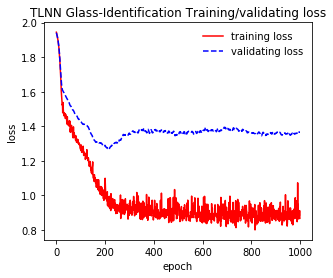

In [12]:
#----------------------------------------
# Summarize history for loss.

plt.ion()

plt.figure('TLNN Glass-Identification loss', figsize = (4.8, 4.0))
plt.plot(history.history['loss'], "r-")
plt.plot(history.history['val_loss'], "b--")
plt.title('TLNN Glass-Identification Training/validating loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validating loss'], loc = "best", frameon = False)


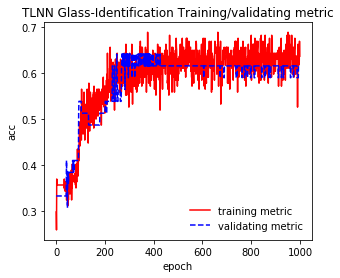

In [13]:
#----------------------------------------
# Summarize history for metric.

plt.figure('TLNN Glass-Identification metric', figsize = (4.8, 4.0))
plt.plot(history.history['acc'], "r-")
plt.plot(history.history['val_acc'], "b--")
plt.title('TLNN Glass-Identification Training/validating metric')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['training metric', 'validating metric'], loc = "best", frameon = False)
